# ////////////////////////------------------------------//////////////////////////

# ALGORITHME DE DÉTECTION DE FAUX BILLETS :

# --------------------------------------------------------------------------------------
# -------------------||||||||| ONCFM  |||||||||||
# --------------------------------------------------------------------------------------

In [61]:
# ******************************************************************************************************************

### 1 / On récupère les données

#### =====> Billets.csv

### 2 / On visualise notre jeu de données

### 3 / Traitement des données manquantes

#### -----A----- via une imputation statistique par les moyennes ------------
#### -----B----- via une régression linéaire -------------------------------------------
#### -----C----- via une composition multi-modèles "state-of-the-Art" -----

### 4 / Régression Logistique classique

### 5 / K-MEANS duquel seront utilisés les centroïdes pour réaliser la prédiction

### 6 / Conclusions relatives à l'optimisation

### 7 / Utiliser l'algorithme développé pour analyser de nouvelles données 

In [62]:
# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# ------------------------------------------------------------------------------------------------------

# 1 / Récupération des données : -----------------------------------

## Installation des librairies : ------------------------------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
pip install scikit-learn==1.0

Note: you may need to restart the kernel to use updated packages.


## Chargement des données : ------------------------------

In [4]:
Billets = pd.read_csv("billets - billets.csv",sep=';')
Billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


## Visualisation des Nans : ------------------------------

In [5]:
(Billets.isna().sum()/Billets.shape[0]).sort_values(ascending=True)

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_up       0.000000
length          0.000000
margin_low      0.024667
dtype: float64

# ------------------------------------------------------------------------------------------------------

# 2 / Visualisation rapide du jeu de données :

In [6]:
Billets.describe(include='all')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,NaN,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,NaN,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,NaN,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,NaN,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,NaN,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000


## Appairement des variables : ------------------------------

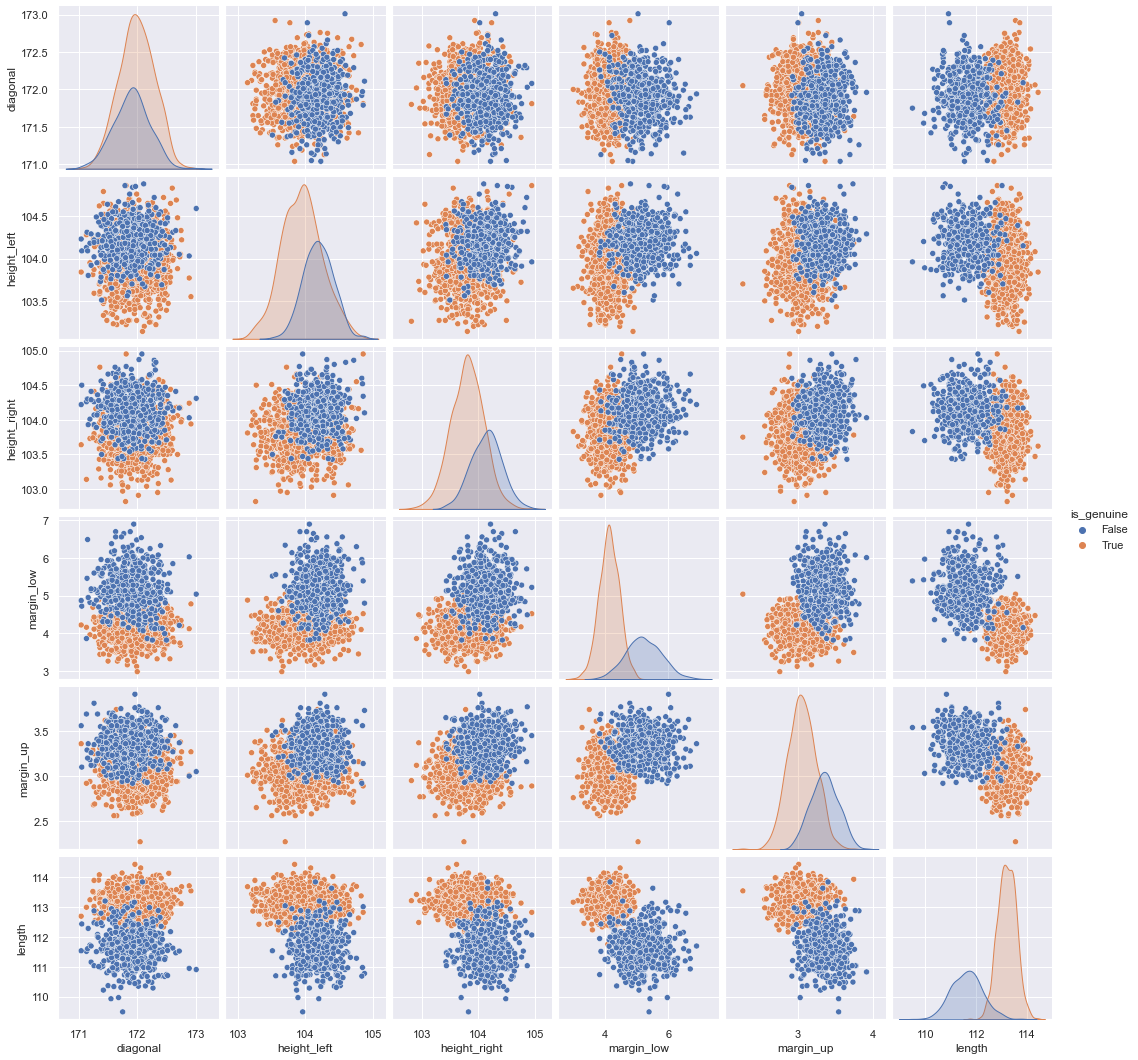

In [47]:
sns.pairplot(Billets, hue="is_genuine")

# Tendances Gaussiennes : ------------------------------

C:\Users\cyril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cyril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cyril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

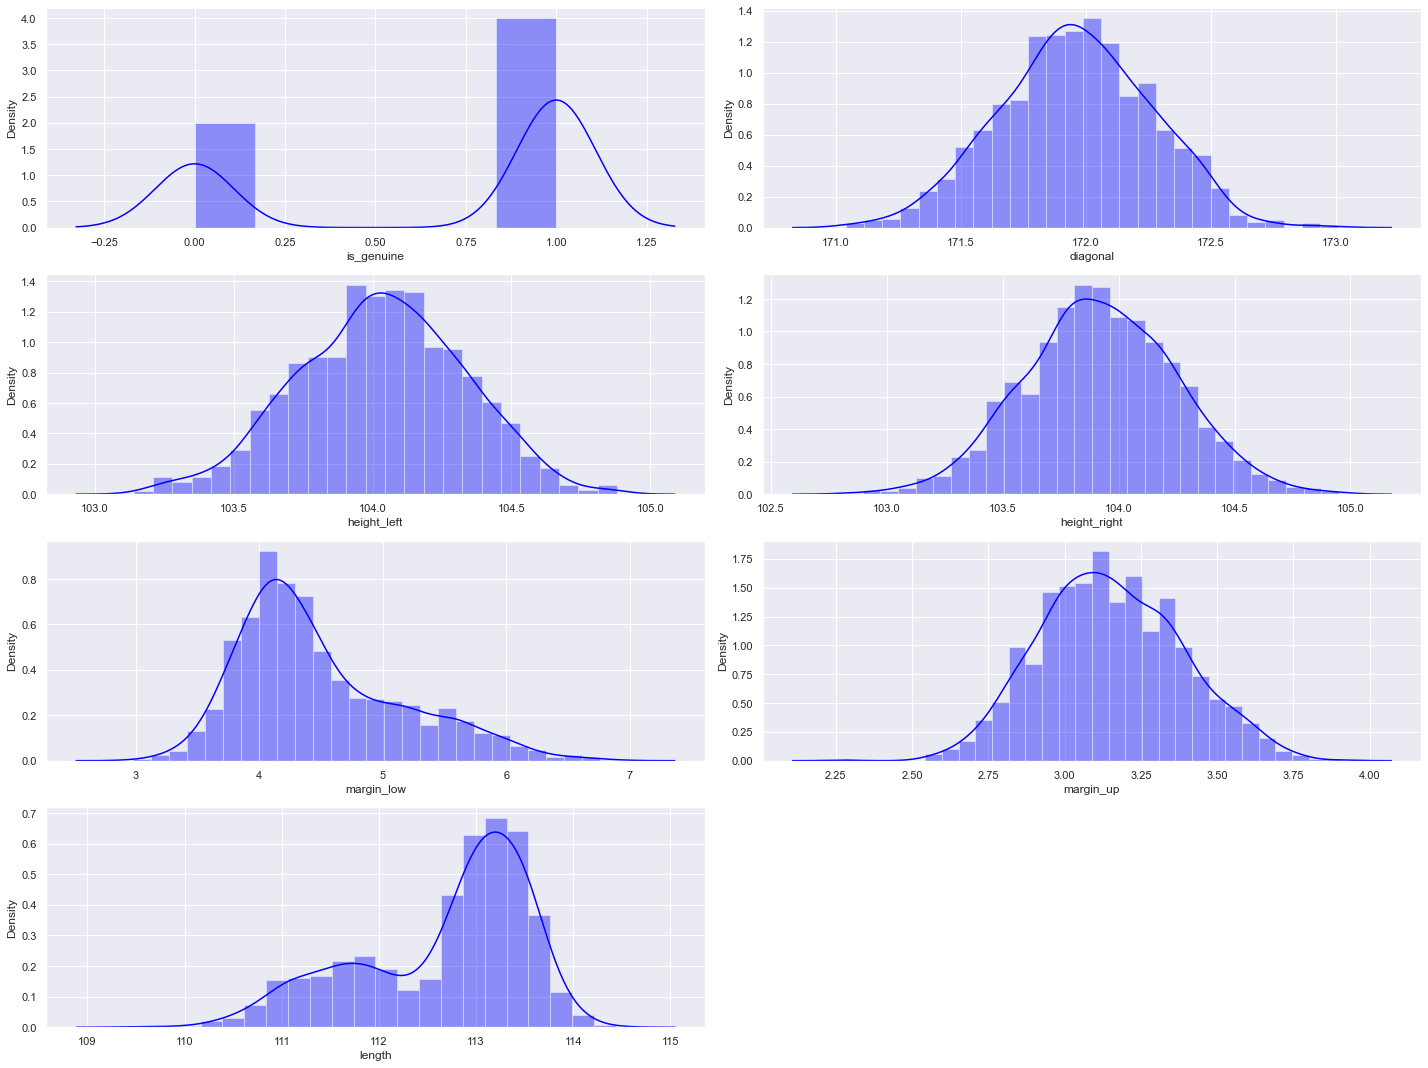

In [48]:
# Visualisation rapide des variables :

num_feat = Billets

plt.figure(figsize=(20,15));
for i, feat in enumerate(num_feat):
    plt.subplot(4,2,i+1);
    sns.distplot(x=num_feat[feat], color = 'Blue')
    plt.xlabel(feat)
    plt.tight_layout();

###   !!!!!!!   Observons les rapports dissociatifs qui vont le plus nous intéresser :  !!!!!!!!

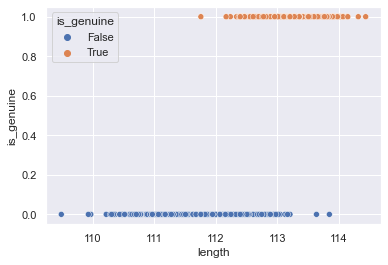

In [7]:
sns.set()

ax = sns.scatterplot(x="length", y="is_genuine", data=Billets ,hue="is_genuine")

### Rapport entre VRAIS/FAUX billets pour les MARGIN_UP :

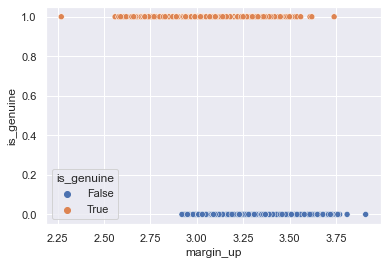

In [8]:
ax = sns.scatterplot(x="margin_up", y="is_genuine", data=Billets, hue="is_genuine")

### Rapport entre VRAIS/FAUX billets pour les MARGIN_LOW :

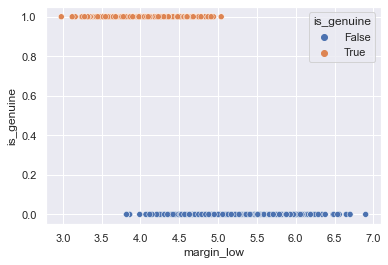

In [9]:
ax = sns.scatterplot(x="margin_low", y="is_genuine", data=Billets, hue="is_genuine")

# 3/ Traitement des données manquantes :

## -----A----- via une imputation statistique par les moyennes ------------
## -----B----- via une régression linéaire -------------------------------------------
## -----C----- via une composition multi-modèles "state-of-the-Art" -----

In [10]:
##############################################################################################################

### --- A ---- via une imputation statistique par les moyennes (rejet)

### --- B ---- via une régression linéaire multiple (rejet)

In [11]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [12]:
Billets_sansNan = Billets.dropna()

In [13]:
# Normalisation de X et y : 

X = Billets_sansNan.drop(columns=["margin_low"])
y = Billets_sansNan.margin_low

X_stdscl = RobustScaler().fit_transform(X)

# Préparation des sets train et test :

X_train, X_test, y_train, y_test = train_test_split(X_stdscl, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [15]:
LR.fit(X_train,y_train)

LinearRegression()

In [16]:
y_prediction = LR.predict(X_test)

### Accordez-vous plus d'importance aux grandes erreurs qu'aux petites?
#### Privilégier la MAE si les erreurs importantes sont pour vous autant importantes que les petites.
#### Ici je priviligirais la MSE comme les erreurs importantes sont à prendre en compte avec plus d'importance que les petites, nous sommes sur du nettoyage de données et cherchons en priorité à maintenir nos amplitudes variationnelles le plus justement pour la qualité finale de l'algorithme.

In [17]:
# Récupération des librairies de scoring :
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import *

## Résultats :

In [18]:
score = r2_score(y_test, y_prediction)

In [19]:
print("r2 score est : ",score)

r2 score est :  0.6740384594304604


In [20]:
# MSE
print("Mean_sqrd_error = ", mean_squared_error(y_test,y_prediction))

Mean_sqrd_error =  0.13739452871780822


In [21]:
# RMSE (racine carrée de la MSE afin de récupérer une notabilité intéressante comptabilisant l'importance) :
print("root_mean_squared error of is = ", (np.sqrt(mean_squared_error(y_test, y_prediction))))

root_mean_squared error of is =  0.3706676796239567


# -----------------------------------------------------------------------------------------------------

## Conclusion : R2 = 67,40%
## -------------- nos MSE et RMSE ne sont pas de qualité exceptionnelle !!!!!!  --------------------
## Gonflons notre modèle :  
### J'ai personnellement tester une pipeline composite avec scaling, utilisation de features polynomiales adjointes à un SGDClassifier pour décupler la puissance du modèle... le modèle montait à 99.68% mais faisons encore mieux.

## --------C--------- via une composition multi-modèles... 
## ("state-of-the-art quality level" sans les têtes d'études OPTUNA)

In [22]:
#####################################################################################################################

### Dans la recherche du meilleur modèle possible une combinaison de têtes d'études OPTUNA insérées dans
### le squelette algorithmique d'Auto-Gluon, le plus puissant auto-ml à l'heure actuelle me semble optimal.
### L'hyperparamétrage in-depth d'Auto-Gluon permets de faire :
### => du tuning de kwargs,
### => du level-stacking,
### => des sacs de folds,
### => des prédicateurs lumières, bref, plein de choses géniales !
### => OPTUNA est là pour profiter des stratégies néo-bayésienne de réglage hyperparamétrique.

In [23]:
#####################################################################################################################

In [24]:
pip install -U scikit-learn==1.0

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install --upgrade tensorflow-gpu --user

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install autogluon

Note: you may need to restart the kernel to use updated packages.


In [27]:
# from sklearn.utils import fixes
from sklearn.linear_model import LogisticRegression
from autogluon.tabular import TabularDataset
from autogluon.tabular import TabularPredictor as task
import pandas as pd

# --------------------------------------------------------------------------------------------------

## 1- Création des jeux  X_train, y_train et X_test, y_test 
## avec les données sans Nans pour tester notre algorithme :
## ------------------------------------
## TARGET : 'margin_low' :
## ------------------------------------

### Récupération des données :

In [28]:
Billets = pd.read_csv("billets - billets.csv",sep=';')

Billets['ID']=Billets.index
Billets = Billets.sort_index()
Billets['is_genuine'] = Billets['is_genuine'].astype('bool')
Billets_margin_low_nan = Billets.loc[Billets['margin_low'].isna(),:]

### Nettoyage de données :

In [29]:
# Retrait des Nans :
Billets = Billets.dropna()

In [30]:
# Récupération du dataframe X sans la colonne "margin_low" et création d'un dataframe y contenant les "margin_low" :
X = Billets.drop(columns=["margin_low"])
y = Billets.margin_low

In [31]:
# Retransformation en DataFrame :
X = pd.DataFrame(X)
y = pd.DataFrame(y)

## Création SPLIT pour pouvoir tester notre algorithme :
# ---------------------------------------------

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
X_train = X_train.sort_index()
X_train.head(3)

,is_genuine,diagonal,height_left,height_right,margin_up,length,ID
0,True,171.81,104.86,104.95,2.89,112.83,0
1,True,171.46,103.36,103.66,2.99,113.09,1
2,True,172.69,104.48,103.50,2.94,113.16,2


In [34]:
X_test = X_test.sort_index()
X_test.head(3)

,is_genuine,diagonal,height_left,height_right,margin_up,length,ID
15,True,171.73,103.92,103.74,2.78,112.98,15
23,True,172.56,103.85,103.62,3.13,113.37,23
29,True,171.58,103.59,103.79,2.92,113.56,29


In [35]:
y_train = y_train.sort_index()
y_train.head(3)

,margin_low
0,4.52
1,3.77
2,4.40


In [36]:
y_test = y_test.sort_index()
y_test.head(3)

,margin_low
15,4.43
23,3.32
29,4.10


## Préparation pour Auto-Gluon => Fusion des données pour avoir un X_train et un y_train compacts :

# ----------------------- Préparation de X_train_gluon FUSION ok  : -------------------

In [37]:
# Fusion pour X_train_gluon :

X_train_gluon = X_train.merge(y_train,left_on = X_train.ID,right_on=y_train.index,how="inner")
X_train_gluon.index = X_train_gluon.ID
X_train_gluon = X_train_gluon.sort_index()
X_train_gluon = X_train_gluon.drop(columns=['ID'])
X_train_gluon = X_train_gluon.drop(columns=['key_0'])
X_train_gluon

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
ID,,,,,,,
0,True,171.81,104.86,104.95,2.89,112.83,4.52
1,True,171.46,103.36,103.66,2.99,113.09,3.77
2,True,172.69,104.48,103.50,2.94,113.16,4.40
3,True,171.36,103.91,103.94,3.01,113.51,3.62
4,True,171.73,104.28,103.46,3.48,112.54,4.04
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,3.09,111.28,4.42
1496,False,172.19,104.63,104.44,3.37,110.97,5.27
1497,False,171.80,104.01,104.12,3.36,111.95,5.51


# ----------------------- Préparation de X_test_gluon : ---------------------------------

In [38]:
X_test_gluon = X_test
X_test_gluon.index = X_test_gluon.ID
X_test_gluon = X_test_gluon.sort_index()
X_test_gluon = X_test_gluon.drop(columns=['ID'])
X_test_gluon

y_test_gluon = y_test
y_test_gluon

,margin_low
15,4.43
23,3.32
29,4.10
30,4.00
32,4.62
...,...
1486,3.99
1487,4.88
1488,5.88
1490,6.06


# ----------------------  X_train_gluon & X_test_gluon prêts : --------------------

# --------- Feature engineering  : -----------------------------

In [39]:
# Déclaration des types pour chaque variable :

X_train_gluon.is_genuine = X_train_gluon.is_genuine.astype("bool")

X_train_gluon.margin_low = X_train_gluon.margin_low.astype("float")

X_train_gluon.length = X_train_gluon.length.astype("float")

X_train_gluon.margin_up = X_train_gluon.margin_up.astype("float")

X_train_gluon.height_right = X_train_gluon.height_right.astype("float")

X_train_gluon.height_left = X_train_gluon.height_left.astype("float")

X_train_gluon.diagonal = X_train_gluon.diagonal.astype("float")

In [40]:
X_test_gluon.is_genuine = X_test_gluon.is_genuine.astype("bool")

# X_test_gluon.margin_low = X_test_gluon.margin_low.astype("float")

X_test_gluon.length = X_test_gluon.length.astype("float")

X_test_gluon.margin_up = X_test_gluon.margin_up.astype("float")

X_test_gluon.height_right = X_test_gluon.height_right.astype("float")

X_test_gluon.height_left = X_test_gluon.height_left.astype("float")

X_test_gluon.diagonal = X_test_gluon.diagonal.astype("float")

###  -----------   Contrôle des Nans :   ------------------

In [41]:
(X_train_gluon.isna().sum()/X_train_gluon.shape[0]).sort_values(ascending=True)

is_genuine      0.0
diagonal        0.0
height_left     0.0
height_right    0.0
margin_up       0.0
length          0.0
margin_low      0.0
dtype: float64

In [42]:
# Contrôle de des Nan
(X_test_gluon.isna().sum()/X_test_gluon.shape[0]).sort_values(ascending=True)

is_genuine      0.0
diagonal        0.0
height_left     0.0
height_right    0.0
margin_up       0.0
length          0.0
dtype: float64

# --------------------------  Fusion / Création de X_test_gluon : ------------------------

In [43]:
X_test_gluon = X_test_gluon.merge(y_test,left_on = X_test_gluon.index,right_on=y_test.index,how="inner")
X_test_gluon = X_test_gluon.sort_index()
X_test_gluon = X_test_gluon.drop(columns=['key_0'])
X_test_gluon.head(3)

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
0,True,171.73,103.92,103.74,2.78,112.98,4.43
1,True,172.56,103.85,103.62,3.13,113.37,3.32
2,True,171.58,103.59,103.79,2.92,113.56,4.10



# ------------------------------ Feature Scaling  : -----------------------------------

## 1 - Normalisation : 
## -------------------------------------------------

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler() # (C'est le plus performant des 3 sur notre jeu de données)
####
X_test_gluon_norma = scaler.fit_transform(X_test_gluon)
X_test_gluon_norma = pd.DataFrame(X_test_gluon_norma)
X_test_gluon_norma = X_test_gluon_norma.rename(columns={0: "is_genuine", 1 : "diagonal", 2 : "height_left", 3 : "height_right", 4 : "margin_up", 5 : "length", 6 : "margin_low"})
####
X_test = X_test_gluon_norma # Jeu pour Autogluon
X_test_00 = X_test.drop(columns=['margin_low']) # Jeu pour les mécanismes de données sklearn
####
y_test = X_test_gluon_norma['margin_low']
y_test = pd.DataFrame(y_test) # Jeu pour Autogluon
y_test_00 = y_test # Jeu pour les mécanismes de données sklearn
####
X_train_gluon_norma = scaler.fit_transform(X_train_gluon)
X_train_gluon_norma = pd.DataFrame(X_train_gluon_norma)
X_train_gluon_norma = X_train_gluon_norma.rename(columns={0: "is_genuine", 1 : "diagonal", 2 : "height_left", 3 : "height_right", 4 : "margin_up", 5 : "length", 6 : "margin_low"})
X_train = X_train_gluon_norma # Jeu pour Autogluon
X_train_00 = X_train.drop(columns=['margin_low'])
####
y_train = X_train_gluon_norma['margin_low']
y_train = pd.DataFrame(y_train) # Jeu pour Autogluon
y_train_00 = y_train

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression().fit(X_train_00, y_train_00)
model.score(X_train_00,y_train_00)

0.603032658910283

In [47]:
model.score(X_test_00,y_test_00)

0.6472524520586954

## Résultats de notre régression linéaire multiple : 66.93 % de bonnes réponses au test.

# ------------------------------------------------------------------------------------------------------

## Tentons d'approcher d'autres fonctions ou techniques :

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

def make_data(N, err=1.0, rseed=1):

    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 1. / (X.ravel() + 0.3)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [49]:
# grid.score(X, y) avec le pipeline et la SVC, sans optimisateurs de paramètres.

# Notre fonction obtient un joli score au test : 99,658% de bonnes réponses, nous pourrons l'analyser concrètement sur les résidus sa performance.

# -----------------------------------------------------------------------------------------------

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

# -----------------------------------------------------------------------------------------------------

# Lancement d'un prédicteur tabulaire :

In [51]:
X_train.head(3)

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
0,1.0,0.413043,0.988506,1.000000,0.378049,0.657471,0.392857
1,1.0,0.222826,0.126437,0.367647,0.439024,0.717241,0.201531
2,1.0,0.891304,0.770115,0.289216,0.408537,0.733333,0.362245


In [52]:
X_test.head(3)

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
0,1.0,0.350254,0.496552,0.408046,0.157407,0.752155,0.356495
1,1.0,0.771574,0.448276,0.339080,0.481481,0.836207,0.021148
2,1.0,0.274112,0.268966,0.436782,0.287037,0.877155,0.256798


In [53]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [54]:
# Lancement d'un TabularPredictor :

label = "margin_low"

predictor = TabularPredictor(label=label,verbosity=5).fit(X_train,
                             presets='best_quality', time_limit=32400) #  presets='best_quality'
results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20220526_070950\"
Presets specified: ['best_quality']
============ fit kwarg info ============
User Specified kwargs:
{'auto_stack': True}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': True,
 'calibrate': 'auto',
 'excluded_model_types': None,
 'feature_generator': 'auto',
 'feature_prune_kwargs': None,
 'holdout_frac': None,
 'hyperparameter_tune_kwargs': None,
 'keep_only_best': False,
 'name_suffix': None,
 'num_bag_folds': None,
 'num_bag_sets': None,
 'num_stack_levels': None,
 'pseudo_data': None,
 'quantile_levels': None,
 'refit_full': False,
 'save_space': False,
 'set_best_to_refit_full': False,
 'unlabeled_data': None,
 'use_bag_holdout': False,
 'verbosity': 5}
Saving AutogluonModels/ag-20220526_070950\learner.pkl
Saving AutogluonModels/ag-20220526_070950\predictor.pkl
Beginning AutoGluon training ... 

	CatBoost_BAG_L1: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.catboost.catboost_model.CatBoostModel'>, 'priority': 70}}
	ExtraTreesMSE_BAG_L1: 	{'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile'], 'model_type': <class 'autogluon.tabular.models.xt.xt_model.XTModel'>, 'priority': 60}, 'ag_args_ensemble': {'use_child_oof': True}}
	NeuralNetFastAI_BAG_L1: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.fastainn.tabular_nn_fastai.NNFastAiTabularModel'>, 'priority': 50}}
	XGBoost_BAG_L1: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.xgboost.xgboost_model.XGBoostModel'>, 'priority': 40}}
	NeuralNetTorch_BAG_L1: 	{'ag_args': {'model_type': <class 'autogluon.tabular.models.tabular_nn.torch.tabular_nn_torch.TabularNeuralNetTorchModel'>, 'priority': 25}}
	LightGBMLarge_BAG_L1: 	{'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'ag_args': {'model_type': <cl

KeyboardInterrupt: 

## J'ai sauvegardé le modèle construit sous ag-20220520_181825, chargeons le :

In [55]:
dir = "AutogluonModels/ag-20220520_181825/"

In [56]:
predictor = task.load(dir) # Nécéssaire seulement si le modèle n'avait pas été chargé au préalable

Loading: AutogluonModels/ag-20220520_181825/\predictor.pkl
Loading: AutogluonModels/ag-20220520_181825/\learner.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\trainer.pkl


In [57]:
y_train_pred = predictor.predict(X_train)
# print("Predictions:  ", y_train_pred)

Loading: AutogluonModels/ag-20220520_181825/\models\WeightedEnsemble_L3\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\CatBoost_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\ExtraTreesMSE_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\KNeighborsDist_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\KNeighborsUnif_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBMLarge_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBMXT_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBM_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\NeuralNetFastAI_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\NeuralNetTorch_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\RandomForestMSE_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\XGBoost_BAG_L1\model.pkl
Loading: Autogluo

In [58]:
y_test_pred= predictor.predict(X_test)
y_pred = y_test_pred
print("Predictions:  ", y_test_pred)

Loading: AutogluonModels/ag-20220520_181825/\models\WeightedEnsemble_L3\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\CatBoost_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\ExtraTreesMSE_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\KNeighborsDist_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\KNeighborsUnif_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBMLarge_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBMXT_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBM_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\NeuralNetFastAI_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\NeuralNetTorch_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\RandomForestMSE_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\XGBoost_BAG_L1\model.pkl
Loading: Autogluo

Predictions:   0      0.288721
1      0.308259
2      0.306807
3      0.292621
4      0.319036
         ...   
288    0.559791
289    0.585901
290    0.575589
291    0.583139
292    0.549038
Name: margin_low, Length: 293, dtype: float32


In [59]:
y_pred = pd.DataFrame(y_pred)

# ---------------------------------------------------------------------------------

# 3 - Vérification de qualité du modèle :

# Impact sur les résidus : Entrainement 100 secondes sans normalisation ni scaling :

In [109]:
#err_hist = np.abs(y_test_gluon-y_pred)

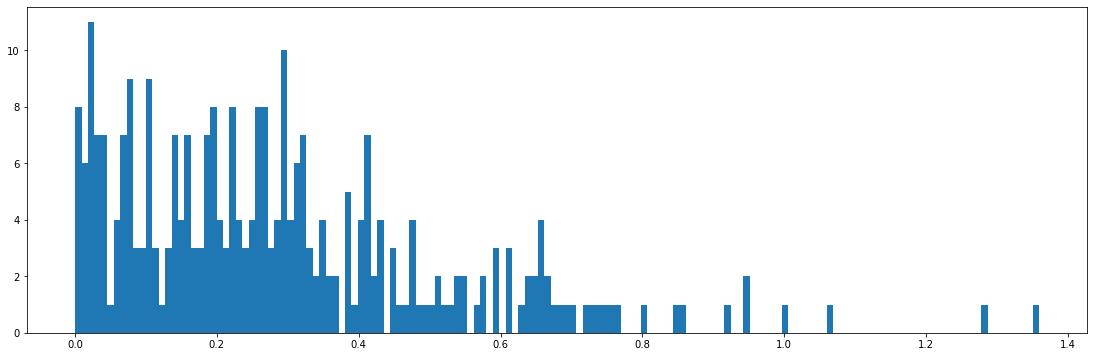

In [111]:
#plt.figure(figsize=(19,6))
#plt.hist(err_hist,bins=150)
#plt.show()

# Affichage des résidus après entraînement pendant 200 secondes sans normalisation ni scaling :

In [242]:
err_hist = np.abs(y_test_gluon-y_pred)

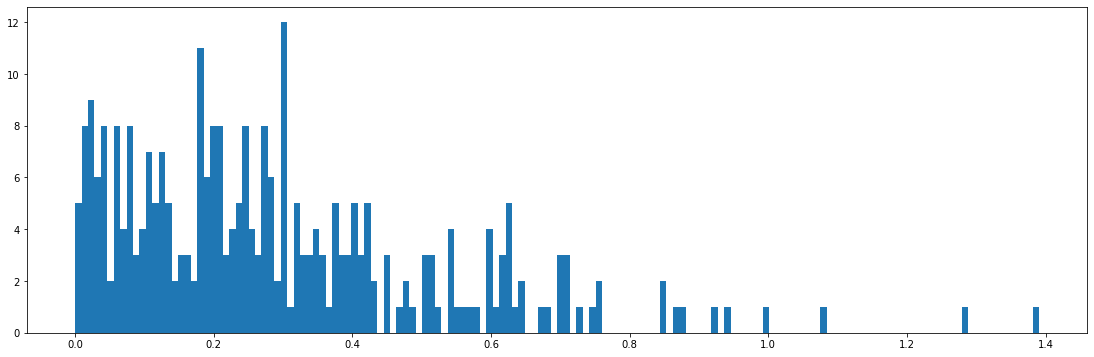

In [243]:
plt.figure(figsize=(19,6))
plt.hist(err_hist,bins=150)
plt.show()

## Affichage des résidus de notre fonction polynomial scaler SVM qui était pourtant à 99.68% :

In [1462]:
err_hist = np.abs(y_test-y_pred)

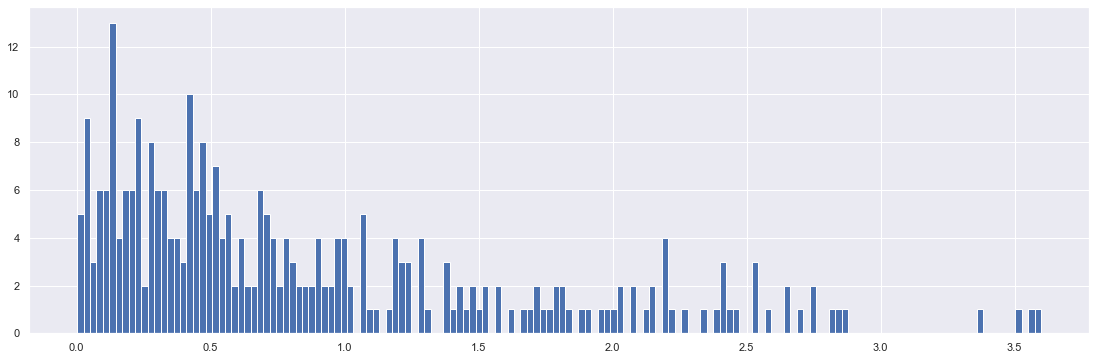

In [1463]:
plt.figure(figsize=(19,6))
plt.hist(err_hist,bins=150)
plt.show()

## Affichage des résidus de notre Auto-Ml de qualité state-of-Art :

In [1697]:
err_hist = np.abs(y_test-y_pred)

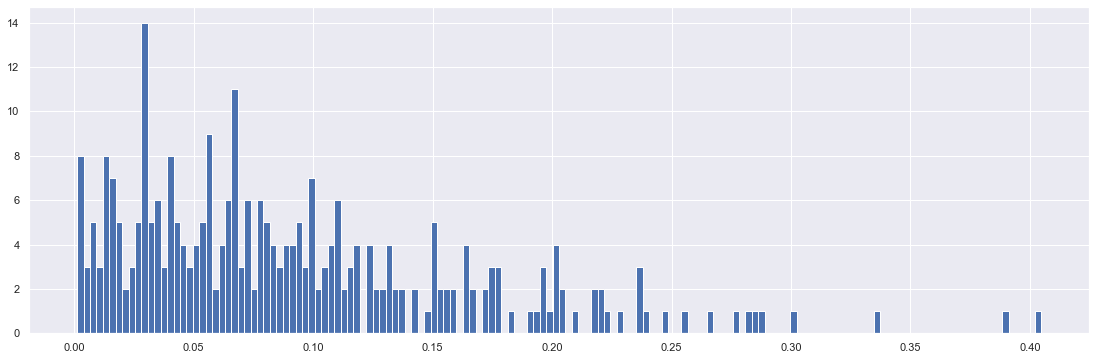

In [1698]:
plt.figure(figsize=(19,6))
plt.hist(err_hist,bins=150)
plt.show()

# ------------------------------------------------------------------------------------------------------

# 3 - L'étude des résidus nous permets de discerner que notre modèle est de qualité :
## ====> On peut avancer ! ====>

# ------------------------------------------------------------------------------------------------------

# Récupération d'un modèle qualitatif de prédiction pour - margin_low -

# -----------------------------------------------------------------------------

## 4 - Préparation des données pour l'exploitation du modèle de prédiction  :

# ------------------------------------------------------------------------------

In [228]:
# Billets_margin_low_nan = Billets.loc[Billets['margin_low'].isna(),:]

# Préparation de X_train_gluon / X_test_gluon  :

In [60]:
Billets.shape

(1463, 8)

In [61]:
X_train_gluon = Billets
X_train_gluon = X_train_gluon.drop(columns=['ID'])
X_train_gluon.shape

(1463, 7)

In [62]:
X_train_gluon.head(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16


In [63]:
X_test_gluon = Billets_margin_low_nan
X_test_gluon = X_test_gluon.drop(columns=['ID'])
X_test_gluon.shape

(37, 7)

In [64]:
X_test_gluon.head(3)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93


In [65]:
y_train_gluon = Billets['margin_low']

#  -----------------------   Jeux de données prêts :   ------------------------

## FEATURE ENGINEERING / SCALING :

In [66]:
X_train_gluon.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

In [67]:
scaler = MinMaxScaler()

In [68]:
X_train_gluon.length = X_train_gluon.length.astype("float")
X_train_gluon.margin_up = X_train_gluon.margin_up.astype("float")
X_train_gluon.margin_low = X_train_gluon.margin_low.astype("float")
X_train_gluon.height_right = X_train_gluon.height_right.astype("float")
X_train_gluon.height_left = X_train_gluon.height_left.astype("float")
X_train_gluon.diagonal = X_train_gluon.diagonal.astype("float")
X_train_gluon.is_genuine = X_train_gluon.is_genuine.astype("bool")

X_train_gluon = scaler.fit_transform(X_train_gluon)
X_train_gluon = pd.DataFrame(X_train_gluon)
X_train_gluon = X_train_gluon.rename(columns={0: "is_genuine", 1 : "diagonal", 2 : "height_left", 3 : "height_right", 4 : "margin_up", 5 : "length", 6 : "margin_low"})

X_train = X_train_gluon # Jeu pour Autogluon
# X_test_00 = X_test.drop(columns=['margin_low']) # Jeu pour les mécanismes de données sklearn

In [69]:
# X_test_gluon = X_test_gluon.drop(columns=['margin_low'])

X_test_gluon.length = X_test_gluon.length.astype("float")
X_test_gluon.margin_up = X_test_gluon.margin_up.astype("float")
X_test_gluon.height_right = X_test_gluon.height_right.astype("float")
X_test_gluon.height_left = X_test_gluon.height_left.astype("float")
X_test_gluon.diagonal = X_test_gluon.diagonal.astype("float")
X_test_gluon.is_genuine = X_test_gluon.is_genuine.astype("bool")

X_test_gluon = scaler.fit_transform(X_test_gluon)
X_test_gluon = pd.DataFrame(X_test_gluon)
X_test_gluon = X_test_gluon.rename(columns={0: "is_genuine", 1 : "diagonal", 2 : "height_left", 3 : "height_right", 4 : "margin_up", 5 : "length"})
####
X_test = X_test_gluon # Jeu pour Autogluon
# X_test_00 = X_test.drop(columns=['margin_low']) # Jeu pour les mécanismes de données sklearn

In [70]:
y_train = X_train_gluon.margin_low

In [71]:
# ***************************************************************************************************************

# Réutilisation du modèle construits pour prédire les margin_low vides :

In [72]:
dir = "AutogluonModels/ag-20220520_181825/"

In [73]:
# Lancement d'un test de prédiction sur X_train :

In [74]:
predictor = task.load(dir) # Nécéssaire seulement si le modèle n'avait pas été chargé au préalable


y_train_pred = predictor.predict(X_train_gluon)
print("Predictions:  ", y_train_pred)

Loading: AutogluonModels/ag-20220520_181825/\predictor.pkl
Loading: AutogluonModels/ag-20220520_181825/\learner.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\trainer.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\WeightedEnsemble_L3\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\CatBoost_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\ExtraTreesMSE_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\KNeighborsDist_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\KNeighborsUnif_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBMLarge_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBMXT_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBM_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\NeuralNetFastAI_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\NeuralNetTorch_BAG_L1\model.pkl

Predictions:   0       0.339806
1       0.289921
2       0.315179
3       0.296746
4       0.289903
          ...   
1458    0.580167
1459    0.583755
1460    0.607786
1461    0.607485
1462    0.547344
Name: margin_low, Length: 1463, dtype: float32


In [75]:
y_pred = predictor.predict(X_test_gluon)

Loading: AutogluonModels/ag-20220520_181825/\models\WeightedEnsemble_L3\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\CatBoost_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\ExtraTreesMSE_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\KNeighborsDist_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\KNeighborsUnif_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBMLarge_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBMXT_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\LightGBM_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\NeuralNetFastAI_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\NeuralNetTorch_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\RandomForestMSE_BAG_L1\model.pkl
Loading: AutogluonModels/ag-20220520_181825/\models\XGBoost_BAG_L1\model.pkl
Loading: Autogluo

### Si nous voulons utiliser l'algo construit pour prédire les lignes margin_low on peut exploiter les lignes ci-dessus.

## Dans notre cas nous déciderons de retirer ces données afin d'avoir une modélisation ou la variance reste la plus pure possible !
## Nous le verrons plus tard mais une learning curve nous démontre que nos algorithmes sont déjà opérationnels après seulement 600 à 700 lignes de données et nousen avons 1463 même avec les Nans...

## On passera sur un autre Notebook afin de garder au maximum notre mémoire de travail et simplifier la partie ou l'algo final de prédiction sera déployé.

# ------------------------------------------------------------------------------------------------------

In [ ]:
# Nous poursuivrons néanmoins ce qui était demandé en terme de réalisation dans ce notebook afin d'y voir plus clair.

In [181]:
################################# Contrôle rapide de la moyenne des prédictions et de celle de notre jeux de données :

In [176]:
 # X_test.margin_low.mean()

0.38210219144821167

In [177]:
# X_train.margin_low.mean()

0.3838740624454907

In [180]:
################################## ///////////////.

In [178]:
# Une marge demeure mais la proximité des moyennes est bon signe.

# margin_low calculée et réinsérée dans X_test

# ------------------------------------------------------------------------------

# OBJECTIF 1 TRAITÉ ////////////////////////////////

# ------------------------------------------------------------------------------

# OBJECTIF 2 : TARGET ------------------- 'is_genuine'--- Traité dans le notebook P10_ALGO :

# ------------------------------------------------------------------------------

# 3 / Régression Logistique classique :

### Initialisation Régression Logistique

In [119]:
reg_log = smf.glm('is_genuine~length+margin_up+margin_low+height_right+height_left+diagonal',
                   data=Billets, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1463
Model:                            GLM   Df Residuals:                     1456
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.158
Date:                Wed, 18 May 2022   Deviance:                       78.315
Time:                        16:56:27   Pearson chi2:                 2.54e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -243.4159    249.370     -0.976   

## Les variables length / length / height_right sont les plus significatives pour caractériser is_genuine.

In [120]:
reg_log = smf.glm('is_genuine~length+margin_up+margin_low+height_right+height_left',
                   data=Billets, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1463
Model:                            GLM   Df Residuals:                     1457
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.218
Date:                Wed, 18 May 2022   Deviance:                       78.437
Time:                        16:56:27   Pearson chi2:                 2.57e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -176.9107    159.234     -1.111   

In [121]:
reg_log = smf.glm('is_genuine~length+margin_up+margin_low+height_right',
                   data=Billets, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1463
Model:                            GLM   Df Residuals:                     1458
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.777
Date:                Wed, 18 May 2022   Deviance:                       79.555
Time:                        16:56:28   Pearson chi2:                 3.00e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -258.7502    143.318     -1.805   

In [122]:
reg_log = smf.glm('is_genuine~length+margin_up+margin_low',
                   data=Billets, family=sm.families.Binomial()).fit()
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1463
Model:                            GLM   Df Residuals:                     1459
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45.365
Date:                Wed, 18 May 2022   Deviance:                       90.731
Time:                        16:56:29   Pearson chi2:                 8.53e+03
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -645.3349     89.293     -7.227      0.0

## En poursuivant la régression logistique nous pouvons découvrir les variables par ordre de significativité.

# ------------------------------------------------------------------------------------------------------

## Chargement des librairies complémentaires

In [79]:
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import accuracy_score

# Régression logistique avec scikit ----------

# Train Test Split :

# Régression logistique :

# Régression logistique avec statsmodel : --------------------

# Régression logistique : OK
# -----------------------------------------

# Réalisation d'une régression linéaire :

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from functions import *
Billets.is_genuine = Billets.is_genuine.astype(int)

In [106]:
reg_multi = smf.ols('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length', data=Billets).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             is_genuine   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1322.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        09:54:07   Log-Likelihood:                 384.34
No. Observations:                1463   AIC:                            -754.7
Df Residuals:                    1456   BIC:                            -717.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.2646      3.753     -3.268   

Le R2 vaut environ 0.845, et le R2 ajusté est d'environ 0.844.

*Cette valeur est plus élevée qu'en régression linéaire simple, et c'est logique, car lorsque l'on rajoute des variables explicatives potentielles, on accroît naturellement la valeur du R2.

Toutes nos variables ont une p-value sous le seuil des 5% donc à un niveau de test alpha = 5% nous pouvons dire que toutes nos variables sont signifiantes.

In [38]:
# ////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Retour sur les algorithmes :
## Exemples de fonctions tester ou raliser pour déterminer le meilleur modèle possible :

# Batterie de pré-tests de sélection de modèle :

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

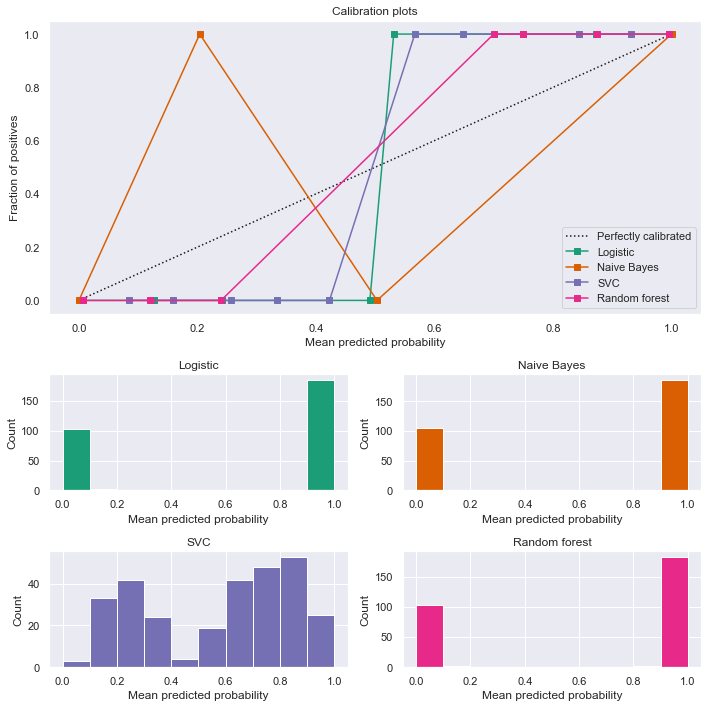

In [112]:
import numpy as np

from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X_train, y_train):
        super().fit(X_train, y_train)
        df = self.decision_function(X_train)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X_train):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X_train)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0)
rfc = RandomForestClassifier()

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (svc, "SVC"),
    (rfc, "Random forest"),
]
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

# Les résultats de notre pré-test montrent que tous les modèles obtiendront de bonnes performances.
# Nos prochaines recherches seront donc le temps d'apprentissage et les réglages d'optimisation.

(1463, 8)
        is_genuine     diagonal  height_left  height_right   margin_low  \
count  1463.000000  1463.000000  1463.000000   1463.000000  1463.000000   
mean      0.663705   171.959193   104.031333    103.921476     4.485967   
std       0.472603     0.305457     0.299605      0.324181     0.663813   
min       0.000000   171.040000   103.140000    102.910000     2.980000   
25%       0.000000   171.750000   103.825000    103.710000     4.015000   
50%       1.000000   171.960000   104.040000    103.920000     4.310000   
75%       1.000000   172.170000   104.230000    104.150000     4.870000   
max       1.000000   173.010000   104.880000    104.950000     6.900000   

         margin_up       length           ID  
count  1463.000000  1463.000000  1463.000000  
mean      3.153083   112.674757   749.966507  
std       0.231466     0.873222   434.293326  
min       2.270000   109.490000     0.000000  
25%       2.990000   112.020000   373.500000  
50%       3.140000   112.960000 

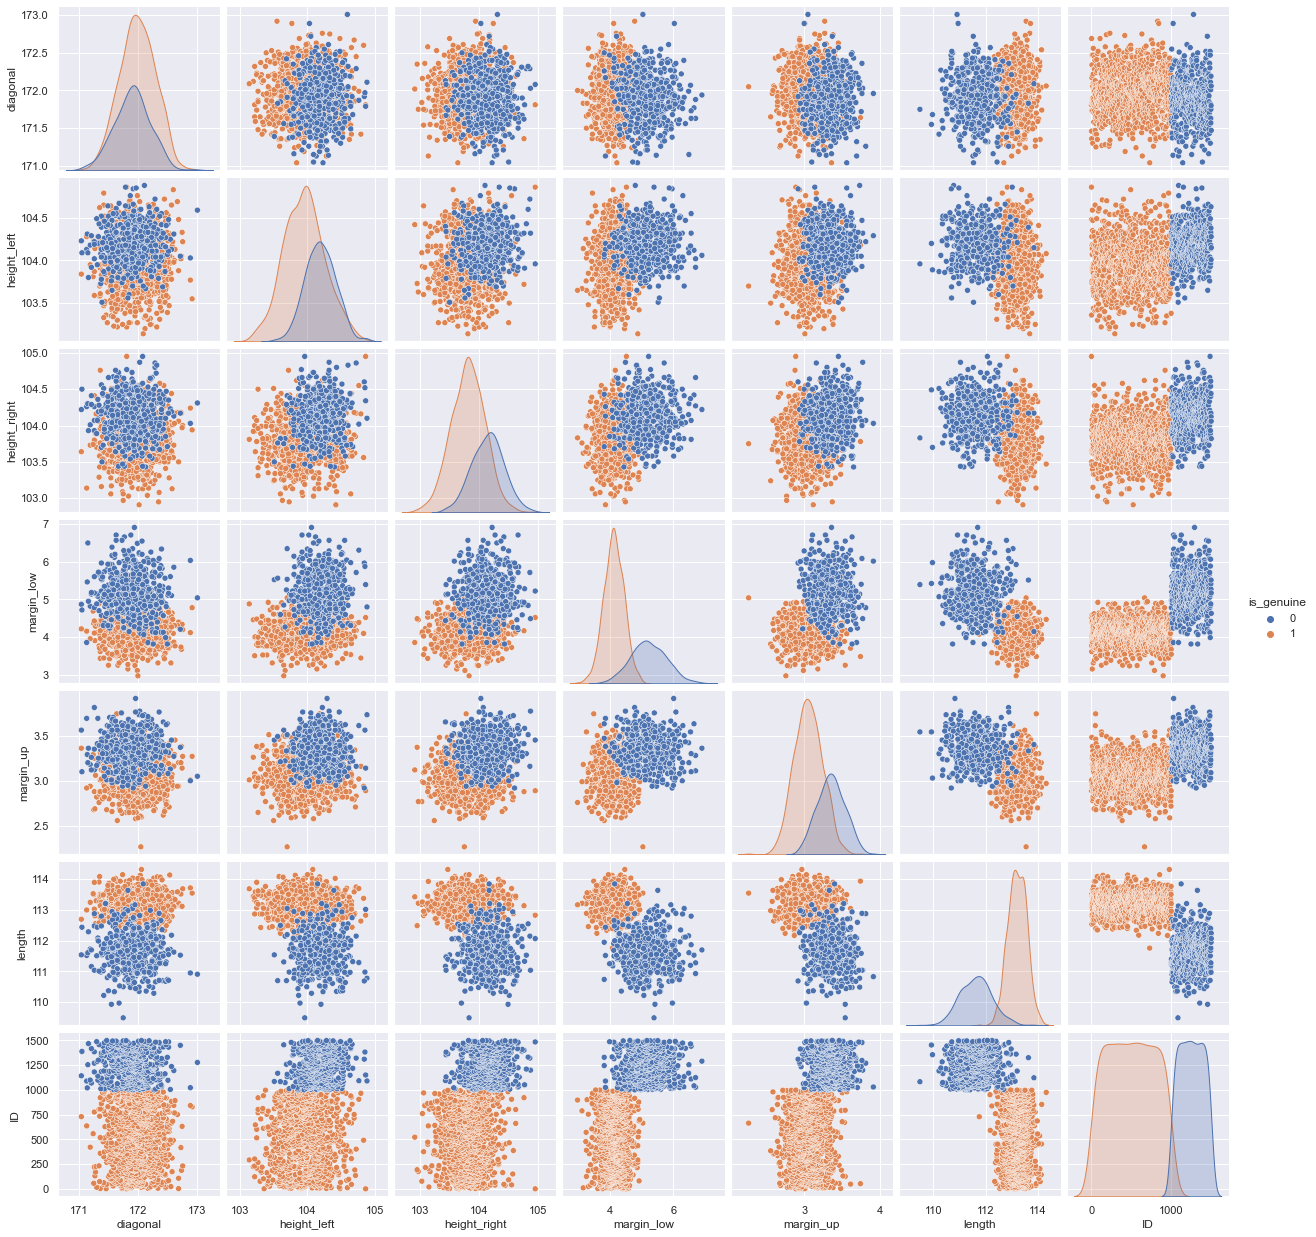

In [122]:
#modification du dossier par défaut
import os
import pandas as pandas
#fromage = Billets
#dimension des données
print(Billets.shape)
#statistiques descriptives
print(Billets.describe())
#graphique - croisement deux à deux des variables
sns.pairplot(Billets,hue='is_genuine')

In [124]:
#k-means sur les données centrées et réduites
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(Billets)

#index triés des groupes
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes
print(pd.DataFrame(Billets.index[idk],kmeans.labels_[idk]))

#distances aux centres de classes des observations
print(kmeans.transform(Billets))

#correspondance avec les groupes de la CAH
pd.crosstab(groupes_cah,kmeans.labels_)

      0
0     0
0   255
0   254
0   253
0   252
..  ...
3   625
3   626
3   627
3   629
3   747

[1463 rows x 1 columns]
[[ 186.64418846 1310.60268397  936.06737752  560.92783865]
 [ 185.63966636 1309.60354387  935.06713964  559.92634317]
 [ 184.64031464 1308.6030954   934.06698874  558.92645784]
 ...
 [1310.36417648  186.39950765  560.93563544  936.07693811]
 [1311.36366035  187.40006017  561.93485941  937.07618805]
 [1312.36350301  188.40112894  562.93472073  938.07597526]]


NameError: name 'groupes_cah' is not defined

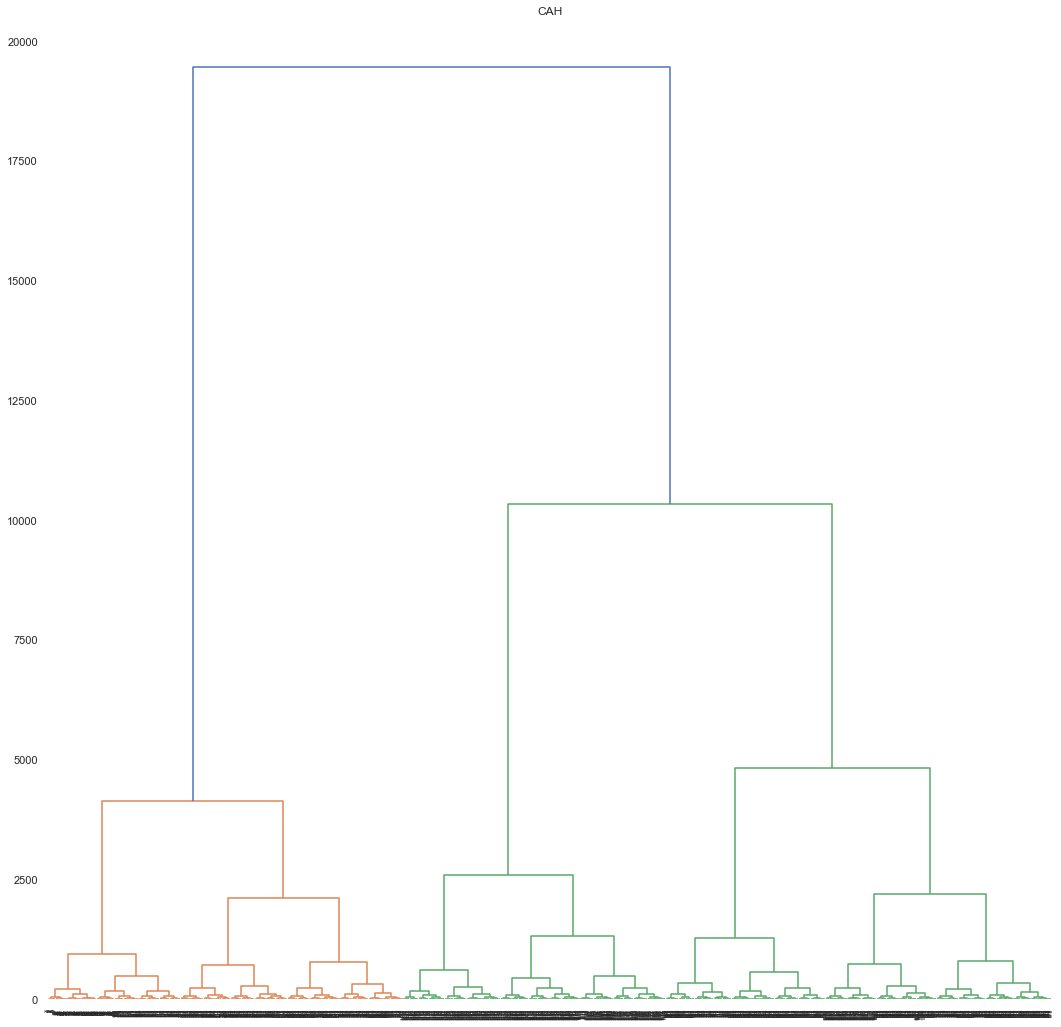

In [125]:
plt.figure(figsize=(18,18))
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#générer la matrice des liens
Z = linkage(Billets,method='ward',metric='euclidean')

#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z)

plt.show()

In [126]:
length

NameError: name 'length' is not defined

In [127]:
Billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,ID
0,1,171.81,104.86,104.95,4.52,2.89,112.83,0
1,1,171.46,103.36,103.66,3.77,2.99,113.09,1
2,1,172.69,104.48,103.50,4.40,2.94,113.16,2
3,1,171.36,103.91,103.94,3.62,3.01,113.51,3
4,1,171.73,104.28,103.46,4.04,3.48,112.54,4
...,...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28,1495
1496,0,172.19,104.63,104.44,5.27,3.37,110.97,1496
1497,0,171.80,104.01,104.12,5.51,3.36,111.95,1497
1498,0,172.06,104.28,104.06,5.17,3.46,112.25,1498


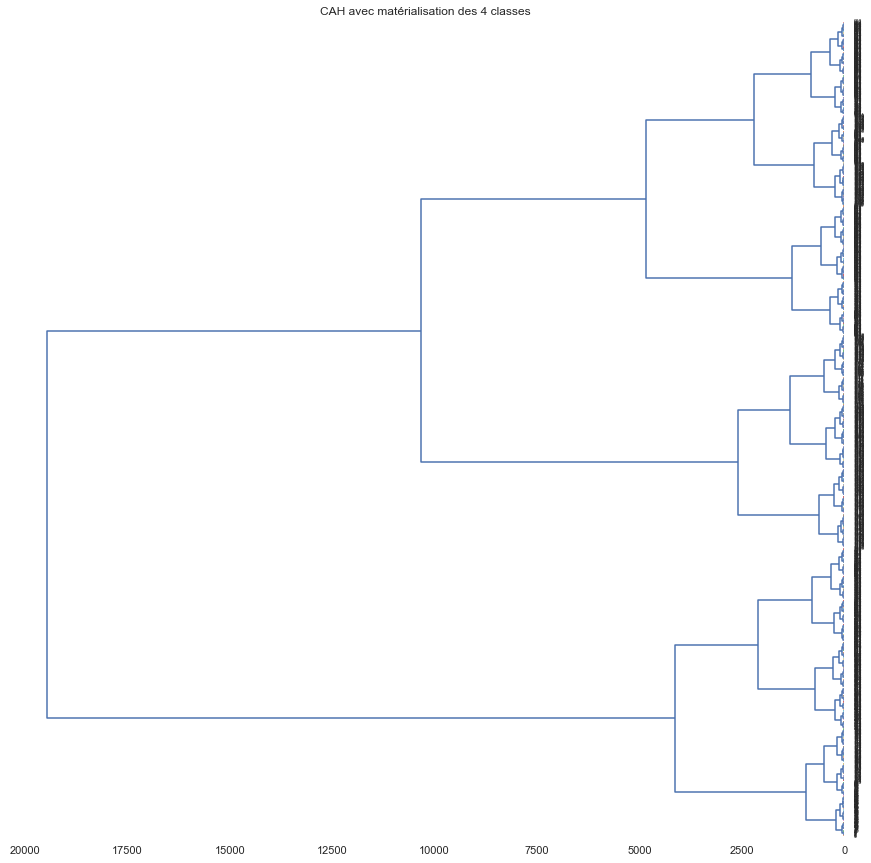

[  1   1   1 ... 106 106 106]
       0
1      0
1      1
1      2
1      3
1      4
..   ...
291  900
291  901
291  902
291  903
291  904

[1463 rows x 1 columns]


In [128]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist

#matérialisation des 4 classes (hauteur t = 7)
plt.figure(figsize=(15,15))
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=Billets.index,orientation='left',color_threshold=7)
plt.show()
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus
groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pandas.DataFrame(Billets.index[idg],groupes_cah[idg]))

In [130]:
#k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(Billets)
#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
print(pandas.DataFrame(Billets.index[idk],kmeans.labels_[idk]))
#distances aux centres de classes des observations
print(kmeans.transform(Billets))
#correspondance avec les groupes de la CAH
pandas.crosstab(groupes_cah,kmeans.labels_)

       0
0   1499
0   1240
0   1241
0   1242
0   1243
..   ...
3   1009
3   1010
3   1011
3   1013
3    750

[1463 rows x 1 columns]
[[1310.09568564  556.29343778  184.08403679  933.48053563]
 [1309.09654309  555.29193773  183.0794399   932.48028744]
 [1308.09609514  554.29205641  182.08009489  931.48013834]
 ...
 [ 186.90649316  940.71133331 1312.92442631  563.52249317]
 [ 187.90702891  941.71058791 1313.92391146  564.52171651]
 [ 188.90809399  942.71037527 1314.92375483  565.52157545]]


col_0,0,1,2,3
row_0,,,,
1,0,0,5,0
2,0,0,7,0
3,0,0,6,0
4,0,0,4,0
5,0,0,5,0
...,...,...,...,...
287,0,0,0,7
288,0,0,0,7
289,0,0,0,4


In [131]:
Billets.loc[Billets['is_genuine']==True,:].shape

(971, 8)

In [132]:
Billets.loc[Billets['is_genuine']==False,:].shape

(492, 8)

In [133]:
492/(492+971)

0.3362952836637047

[0.62815351 0.58909524 0.5709593  0.55913135 0.55233613 0.54759652
 0.54246272 0.53890369 0.53662111]


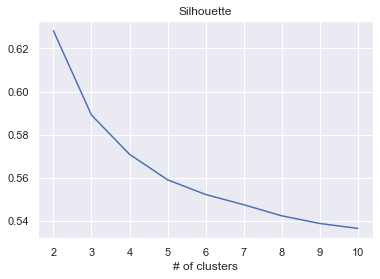

In [134]:
#librairie pour évaluation des partitions
from sklearn import metrics
from sklearn import cluster
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10

res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(Billets)
    res[k] = metrics.silhouette_score(Billets,km.labels_)
    
print(res)
    
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [135]:
from sklearn.cluster import KMeans

#moyenne par variable
m = Billets.mean()

#TSS
TSS = Billets.shape[0]*Billets.var(ddof=0)

print(TSS)
#data.frame conditionnellement aux groupes
gb = Billets.groupby(kmeans.labels_)

#effectifs conditionnels
nk = gb.size()

print(nk)

#moyennes conditionnelles
mk = gb.mean()

print(mk)

#pour chaque groupe écart à la moyenne par variable
EMk = (mk-m)**2

#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)

#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print(BSS)

#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes
#pour chaque variable
R2 = BSS/TSS
print(R2)

is_genuine      3.265427e+02
diagonal        1.364106e+02
height_left     1.312341e+02
height_right    1.536466e+02
margin_low      6.442262e+02
margin_up       7.832880e+01
length          1.114798e+03
ID              2.757488e+08
dtype: float64
0    372
1    363
2    363
3    365
dtype: int64
   is_genuine    diagonal  height_left  height_right  margin_low  margin_up  \
0    0.000000  171.899301   104.189435    104.150806    5.222204   3.345672   
1    1.000000  171.989229   103.967796    103.802562    4.116253   3.045455   
2    1.000000  171.974105   103.936860    103.822424    4.128843   3.058871   
3    0.671233  171.975534   104.027342    103.904521    4.458466   3.157534   

       length           ID  
0  111.649220  1310.094086  
1  113.216777   556.804408  
2  113.189091   184.589532  
3  112.669397   933.479452  
is_genuine      2.459948e+02
diagonal        1.840041e+00
height_left     1.400974e+01
height_right    2.836383e+01
margin_low      2.978309e+02
margin_up       2.

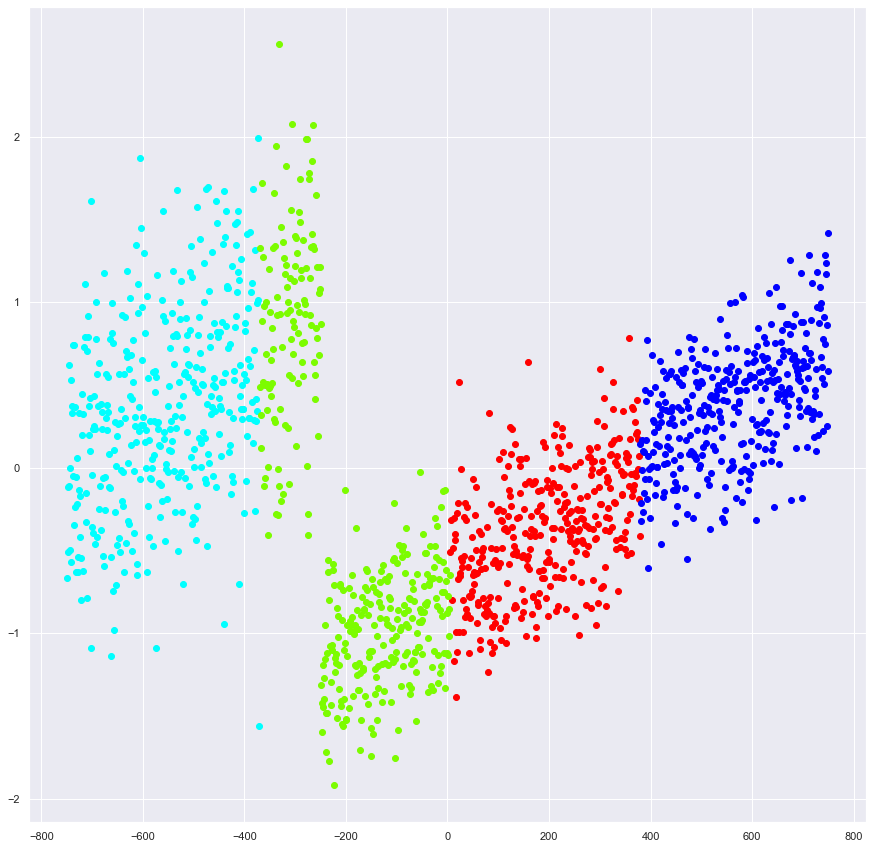

In [139]:
#ACP
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(Billets)
plt.figure(figsize=(15,15))

#projeter dans le plan factoriel
#avec un code couleur différent selon le groupe
#remarquer le rôle de zip() dans la boucle
for couleur,k in zip(['aqua','red','blue','lawngreen'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)

plt.show()

# Sur cette vue nous voyons clairement notre Analyse en Composantes Principales découper notre jeu de données.
# 2 clusters externes désignés comme "sûr" et deux clusters internes de découpage intercatégoriele ou la variance est plus faible. 

(1091, 8)


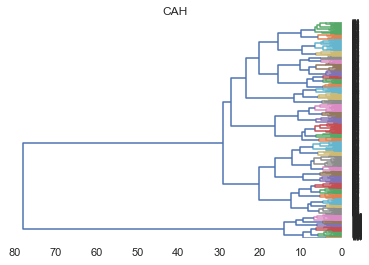

[34 14 22 ...  6  2  4]


In [140]:
from sklearn import preprocessing

#retirer des observations le groupe n°0 du k-means précédent
Billets_subset = Billets.iloc[kmeans.labels_!=0,:]
print(Billets_subset.shape)
#centrer et réduire
Billets_subset_cr = preprocessing.scale(Billets_subset)
#générer la matrice des liens
Z_subset = linkage(Billets_subset_cr,method='ward',metric='euclidean')
#cah et affichage du dendrogramme
plt.title("CAH")
dendrogram(Z_subset,labels=Billets_subset.index,orientation='left',color_threshold=7)
plt.show()
#groupes
groupes_subset_cah = fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)


In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(Billets,y_pred='is_genuine')

ValueError: Found input variables with inconsistent numbers of samples: [1463, 10]

In [143]:
from sklearn.cluster import KMeans
import numpy as np



kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_


ValueError: X has 2 features, but KMeans is expecting 7 features as input.

# -------------------------------------------------------------------------------------------------

# K-NN avec tests de réglage pour paramètres optimisés : 

In [144]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
model = KNeighborsClassifier(n_neighbors=2)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.9974358974358974
test score: 0.9931740614334471


# Validation Set et Cross Validation :

In [159]:
from sklearn.model_selection import cross_val_score

In [161]:
model = KNeighborsClassifier(n_neighbors=4)
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([0.9957265 , 1.        , 1.        , 0.98717949, 1.        ])

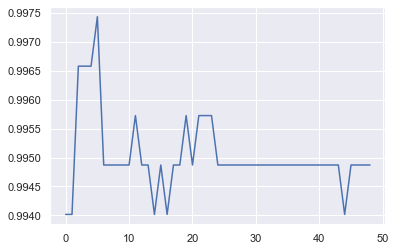

In [162]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# GridSearchCV :

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when

C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when

C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [165]:
print(grid.best_score_)
print(grid.best_params_)

0.9982905982905983
{'metric': 'manhattan', 'n_neighbors': 6}


In [166]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9965870307167235

# Confusion Matrix :

In [167]:
from sklearn.metrics import confusion_matrix

In [168]:
confusion_matrix(y_test, model.predict(X_test))

array([[106,   0],
       [  1, 186]], dtype=int64)

## Learning Curve

In [169]:
from sklearn.model_selection import learning_curve

C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when

C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when

[ 93 187 280 374 468 561 655 748 842 936]


C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  result = super(NeighborsBase, self)._fit(X, y)
C:\Users\cyril\anaconda3\lib\site-packages\daal4py\sklearn\neighbors\_base.py:357: DataConversionWarning: A column-vector y was passed when

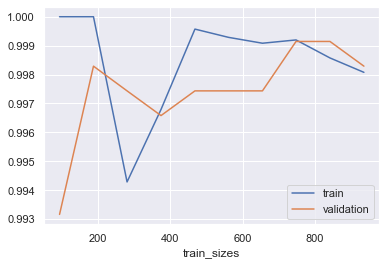

In [170]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

# -------------------------------------------------------------------------------------------------------

# Test de réseau bayésien :

In [171]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score 

model = BayesianRidge() 
model.fit(X_train, y_train)
prediction = model.predict(X_test) 
  
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")

r2 Score Of Test Set : 0.877007743094194


In [172]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 293 points : 2


In [174]:
(1-(2/293))*100

99.31740614334471

# 98.29% de score pour les Réseaux naïfs Gaussien

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# 84.67% de score pour la régression linéaire :

In [177]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8836222460490845

# 100 % sans aucune optimisations pour le SVC !!!!!!!!!!!!

In [178]:
model = LinearSVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

# Le SVC sera le meilleur modèle en rapport avec notre besoin.

# -------------------------------------------------------------------------------------------

In [ ]:
# Brouillon (non nécessaire ^^)

# Réglage des hyperparamètres :

In [187]:
print(grid.best_score_)
print(grid.best_params_)

0.9970703125
{'C': 0.001}


In [188]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9954441913439636

# pas de meilleurs résultats, c'était mes premières fonctions d'approches ...

# Suite des essais réalisés afin d'améliorer le score :

In [195]:
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

[LibLinear]Score:  0.998046875


# Score sur le train : 99.80%

In [196]:
score = lsvc.score(X_test, y_test)
print("Score: ", score)

Score:  1.0


# Score sur le test : 100%

In [197]:
cv_scores = cross_val_score(lsvc, X_train, y_train, cv=5)
print("CV average score: %.4f" % cv_scores.mean())

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]CV average score: 0.9951


# Matrice de confusion :

In [198]:
y_pred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[152   0]
 [  0 287]]


In [199]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       287

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439



In [200]:
lsvc = LinearSVC(verbose=0)
print(lsvc)

lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test, y_pred)
print(cr) 

LinearSVC()
Score:  0.998046875
CV average score: 1.00
[[152   0]
 [  0 287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       287

    accuracy                           1.00       439
   macro avg       1.00      1.00      1.00       439
weighted avg       1.00      1.00      1.00       439



# Nous pouvons facilement voir que le jeu de données n'est pas très compliqué et ne résiste pas longtemps à nos algorithmes :

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

lsvc = LinearSVC()
print(lsvc)

lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score train : ", score)

score = lsvc.score(X_test, y_test)
print("Score test : ", score)

cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

y_pred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test, y_pred)
print(cr) 

LinearSVC()
Score train :  0.9991452991452991
Score test :  0.9965870307167235
CV average score: 1.00
[[ 85   1]
 [  0 207]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       1.00      1.00      1.00       207

    accuracy                           1.00       293
   macro avg       1.00      0.99      1.00       293
weighted avg       1.00      1.00      1.00       293



# Notre algorithme à l'air d'être fiable.
# Un taux de détection parfait sur le jeu de test.

[ 93 187 280 374 468 561 655 748 842 936]


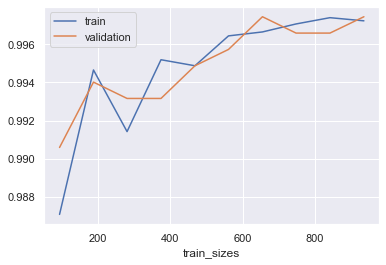

In [203]:
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

# La learning Curve est belle notre test apprend vite et bien.

In [94]:
# ---------------------------------------------------------------------------------------------------------

# Essais divers réalisés afin d emaximiser la qualité du modèle construit :

# --------------------------------------------------------------------------------------------------

# Essayons de tuner un Random Forest Classifier

In [204]:
X_test

array([[ 1.01786037,  0.09571564, -0.65256326, ...,  0.24598333,
         0.92246681, -0.78076819],
       [ 0.46112739,  1.29770691, -0.9919957 , ..., -1.13698239,
         0.73917462, -0.98116212],
       [-1.11082455, -0.30494812,  0.67430904, ...,  0.63494244,
         0.94537833,  0.52294408],
       ...,
       [-0.03010759, -1.00610969, -0.46741829, ..., -0.57515256,
         1.05993595, -1.28981485],
       [ 0.10088841, -0.80577781, -0.06627085, ..., -1.09376471,
         0.28094414, -1.65374866],
       [ 0.06813941, -0.73900052,  1.32231644, ...,  1.58573136,
        -1.08229152,  0.90069817]])

# 1/ Tests sur KNeighborsClassifier(n_neighbors=13)

In [207]:
model = KNeighborsClassifier(n_neighbors=2)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.9991452991452991
test score: 0.9931740614334471


# 2/ Validation Set et Cross Validation

In [208]:
from sklearn.model_selection import cross_val_score

In [209]:
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

array([0.9957265, 1.       , 1.       , 0.9957265, 0.9957265])

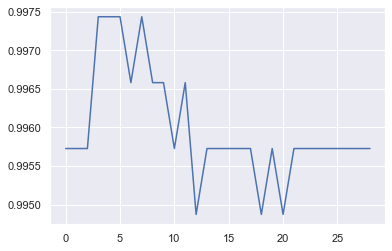

In [210]:
val_score = []
for k in range(1, 30):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

# Très bons résultats très tôt, effectuons des tests :

In [211]:
model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.9974358974358974
test score: 0.9931740614334471


In [212]:
model = KNeighborsClassifier(n_neighbors=2)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.9991452991452991
test score: 0.9931740614334471


In [213]:
model = KNeighborsClassifier(n_neighbors=13)

model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))
print('test score:', model.score(X_test, y_test))

train score: 0.9957264957264957
test score: 0.9931740614334471


In [214]:
# Avec ces paramètres les résultats sont vraiment bons.

# Le KNeighborsClassifier(n_neighbors=2) retient notre attention :
# 99,23% de prédiction valides au train set
# 98,63% de prédictions valides au test set

# Tests d'optimisation par les méthodes d'ensemble learning :

In [215]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import IsolationForest

In [216]:
model_1 = RandomForestClassifier(n_estimators=10000, max_depth = 10)
model_2 = DecisionTreeClassifier(random_state=15)
model_3 = KNeighborsClassifier(n_neighbors=13)

model_4 = VotingClassifier([('RFC', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

RandomForestClassifier 1.0
DecisionTreeClassifier 1.0
KNeighborsClassifier 0.9931740614334471
VotingClassifier 1.0


In [217]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [218]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9931740614334471

In [219]:
model = RandomForestClassifier(n_estimators=10000, max_depth = 10)

model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [220]:
model = RandomForestClassifier(n_estimators=5000, max_depth = 10)

model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [221]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(n_estimators=10000, max_depth = 5)

model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [224]:
model = RandomForestClassifier(n_estimators=1000, max_depth = 6)

model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [225]:
model = RandomForestClassifier(n_estimators=300, max_depth = 7)

model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

# Les modèles développés sont extrêmement puissants même en réduisant grandement leurs performances nous arrivons à 1.

# Déploiement de modules d'Auto-ML afin d'avoir des batteries d'analyses rapides et pertinentes :

In [227]:
pip install --upgrade tensorflow-gpu --user

Note: you may need to restart the kernel to use updated packages.


In [228]:
pip install autogluon

Note: you may need to restart the kernel to use updated packages.


In [229]:
# Lancement d' AutoGluon :

from autogluon.tabular import TabularDataset, TabularPredictor

In [230]:
from sklearn.model_selection import train_test_split

In [70]:
X_train.shape

(1170, 6)

In [231]:
X_test.shape

(293, 7)

In [233]:
X_train

array([[ 0.1336374 ,  1.4312615 ,  1.16802896, ...,  0.93746618,
        -0.94482238,  1.41204821],
       [ 1.44359735,  1.29770691,  0.79773902, ...,  0.67816011,
        -1.60925657,  1.20013738],
       [ 1.41084836,  0.06232699,  1.22974395, ...,  1.1103369 ,
        -0.01690567,  0.94446236],
       ...,
       [ 0.06813941, -0.9393324 , -0.28227331, ...,  0.72137779,
         0.33822295,  0.37552785],
       [ 0.49387639, -1.20644157, -1.51657312, ..., -0.74802328,
         0.47569209, -0.14273232],
       [ 1.08335837,  0.02893835,  0.05715913, ..., -0.66158792,
         1.05993595,  0.16361702]])

In [234]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [235]:
X_train['is_genuine'] = y_train
X_test['is_genuine'] = y_test

In [236]:
X_train

,0,1,2,3,4,5,6,is_genuine
0,0.133637,1.431261,1.168029,1.181509,0.937466,-0.944822,1.412048,0
1,1.443597,1.297707,0.797739,0.201983,0.678160,-1.609257,1.200137,0
2,1.410848,0.062327,1.229744,-0.536430,1.110337,-0.016906,0.944462,0
3,0.821366,1.297707,-1.207998,-0.008992,-0.445500,0.498604,0.555191,1
4,0.559374,-0.138005,-0.436561,1.482902,-0.920894,-0.429313,1.190924,0
...,...,...,...,...,...,...,...,...
1165,-0.521343,-0.238171,-0.158843,-0.777544,-2.174207,0.006006,-0.953522,1
1166,-0.226602,-1.339996,0.612594,-0.174758,-0.402282,0.807909,-1.441838,1
1167,0.068139,-0.939332,-0.282273,-0.144619,0.721378,0.338223,0.375528,1
1168,0.493876,-1.206442,-1.516573,-0.446012,-0.748023,0.475692,-0.142732,1


In [237]:
X_train.isnull().sum()

0             0
1             0
2             0
3             0
4             0
5             0
6             0
is_genuine    0
dtype: int64

In [238]:
X_train.shape

(1170, 8)

In [239]:
X_train.isnull().sum()

0             0
1             0
2             0
3             0
4             0
5             0
6             0
is_genuine    0
dtype: int64

In [240]:
# Création d'un normaliseur standart (scaler) :
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,X_test)
StandardScaler()

C:\Users\cyril\anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


StandardScaler()

In [241]:
X_train

,0,1,2,3,4,5,6,is_genuine
0,0.133637,1.431261,1.168029,1.181509,0.937466,-0.944822,1.412048,0
1,1.443597,1.297707,0.797739,0.201983,0.678160,-1.609257,1.200137,0
2,1.410848,0.062327,1.229744,-0.536430,1.110337,-0.016906,0.944462,0
3,0.821366,1.297707,-1.207998,-0.008992,-0.445500,0.498604,0.555191,1
4,0.559374,-0.138005,-0.436561,1.482902,-0.920894,-0.429313,1.190924,0
...,...,...,...,...,...,...,...,...
1165,-0.521343,-0.238171,-0.158843,-0.777544,-2.174207,0.006006,-0.953522,1
1166,-0.226602,-1.339996,0.612594,-0.174758,-0.402282,0.807909,-1.441838,1
1167,0.068139,-0.939332,-0.282273,-0.144619,0.721378,0.338223,0.375528,1
1168,0.493876,-1.206442,-1.516573,-0.446012,-0.748023,0.475692,-0.142732,1


In [251]:
y_train

<PandasArray>
[0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
 ...
 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
Length: 1170, dtype: int64

In [242]:
X_test

,0,1,2,3,4,5,6,is_genuine
0,1.017860,0.095716,-0.652563,-1.124146,0.245983,0.922467,-0.780768,NaN
1,0.461127,1.297707,-0.991996,-0.461082,-1.136982,0.739175,-0.981162,1.0
2,-1.110825,-0.304948,0.674309,0.156774,0.634942,0.945378,0.522944,1.0
3,-1.405566,1.264318,-0.220558,0.232122,1.023902,-0.841721,1.589408,NaN
4,0.068139,-0.872555,-0.035413,0.397888,-0.445500,0.807909,-0.654082,NaN
...,...,...,...,...,...,...,...,...
288,1.476346,0.362825,0.427449,-0.054201,-0.920894,1.495255,-0.147339,NaN
289,-2.322538,0.663323,0.026302,-0.189828,-2.044554,0.945378,-1.598468,NaN
290,-0.030108,-1.006110,-0.467418,-0.596708,-0.575153,1.059936,-1.289815,NaN
291,0.100888,-0.805778,-0.066271,0.201983,-1.093765,0.280944,-1.653749,1.0


In [244]:
# Lancement d'un TabularPredictor :

label = 'is_genuine'  
eval_metric = 'accuracy'

predictor = TabularPredictor(label=label, eval_metric=eval_metric,
                             verbosity=4).fit(X_train, time_limit=10) #  presets='best_quality'
results = predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20220526_084856\"
============ fit kwarg info ============
User Specified kwargs:
{}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': False,
 'calibrate': 'auto',
 'excluded_model_types': None,
 'feature_generator': 'auto',
 'feature_prune_kwargs': None,
 'holdout_frac': None,
 'hyperparameter_tune_kwargs': None,
 'keep_only_best': False,
 'name_suffix': None,
 'num_bag_folds': None,
 'num_bag_sets': None,
 'num_stack_levels': None,
 'pseudo_data': None,
 'quantile_levels': None,
 'refit_full': False,
 'save_space': False,
 'set_best_to_refit_full': False,
 'unlabeled_data': None,
 'use_bag_holdout': False,
 'verbosity': 4}
Saving AutogluonModels/ag-20220526_084856\learner.pkl
Saving AutogluonModels/ag-20220526_084856\predictor.pkl
Beginning AutoGluon training ... Time limit = 10s
AutoGluon will save models to "Autog

	LightGBMLarge: 	{'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 5, 'ag_args': {'model_type': <class 'autogluon.tabular.models.lgb.lgb_model.LGBModel'>, 'name_suffix': 'Large', 'hyperparameter_tune_kwargs': None, 'priority': 0}}
Fitting 13 L1 models ...
Fitting model: KNeighborsUnif ... Training model for up to 9.94s of the 9.93s of remaining time.
	Dropped 0 of 7 features.
	Fitting KNeighborsUnif with 'num_gpus': 0, 'num_cpus': 4
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
	Using sklearnex KNN backend...
Saving AutogluonModels/ag-20220526_084856\models\KNeighborsUnif\model.pkl
	1.0	 = Validation score   (accuracy)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
Saving AutogluonModels/ag-20220526_084856\models\trainer.pkl
Fitting model: KNeighborsDist ... Training model for up to 9.92s of the 9.91s

[1]	valid_set's binary_error: 0.346154
[2]	valid_set's binary_error: 0.346154
[3]	valid_set's binary_error: 0.346154
[4]	valid_set's binary_error: 0.346154
[5]	valid_set's binary_error: 0.346154
[6]	valid_set's binary_error: 0.0769231
[7]	valid_set's binary_error: 0.0555556
[8]	valid_set's binary_error: 0.0384615
[9]	valid_set's binary_error: 0.017094
[10]	valid_set's binary_error: 0.017094
[11]	valid_set's binary_error: 0.017094
[12]	valid_set's binary_error: 0.0042735
[13]	valid_set's binary_error: 0
[14]	valid_set's binary_error: 0
[15]	valid_set's binary_error: 0
[16]	valid_set's binary_error: 0
[17]	valid_set's binary_error: 0
[18]	valid_set's binary_error: 0
[19]	valid_set's binary_error: 0
[20]	valid_set's binary_error: 0
[21]	valid_set's binary_error: 0
[22]	valid_set's binary_error: 0
[23]	valid_set's binary_error: 0
[24]	valid_set's binary_error: 0
[25]	valid_set's binary_error: 0
[26]	valid_set's binary_error: 0
[27]	valid_set's binary_error: 0
[28]	valid_set's binary_error:

Saving AutogluonModels/ag-20220526_084856\models\LightGBM\model.pkl
	1.0	 = Validation score   (accuracy)
	0.5s	 = Training   runtime
	0.0s	 = Validation runtime
Saving AutogluonModels/ag-20220526_084856\models\trainer.pkl
Fitting model: RandomForestGini ... Training model for up to 8.82s of the 8.81s of remaining time.
	Dropped 0 of 7 features.
	Fitting RandomForestGini with 'num_gpus': 0, 'num_cpus': 4


[1]	valid_set's binary_error: 0.346154
[2]	valid_set's binary_error: 0.346154
[3]	valid_set's binary_error: 0.346154
[4]	valid_set's binary_error: 0.346154
[5]	valid_set's binary_error: 0.346154
[6]	valid_set's binary_error: 0
[7]	valid_set's binary_error: 0
[8]	valid_set's binary_error: 0
[9]	valid_set's binary_error: 0
[10]	valid_set's binary_error: 0
[11]	valid_set's binary_error: 0
[12]	valid_set's binary_error: 0
[13]	valid_set's binary_error: 0
[14]	valid_set's binary_error: 0
[15]	valid_set's binary_error: 0
[16]	valid_set's binary_error: 0
[17]	valid_set's binary_error: 0
[18]	valid_set's binary_error: 0
[19]	valid_set's binary_error: 0
[20]	valid_set's binary_error: 0
[21]	valid_set's binary_error: 0
[22]	valid_set's binary_error: 0
[23]	valid_set's binary_error: 0
[24]	valid_set's binary_error: 0
[25]	valid_set's binary_error: 0
[26]	valid_set's binary_error: 0
[27]	valid_set's binary_error: 0
[28]	valid_set's binary_error: 0
[29]	valid_set's binary_error: 0
[30]	valid_set's 

Saving AutogluonModels/ag-20220526_084856\models\RandomForestGini\model.pkl
	1.0	 = Validation score   (accuracy)
	0.37s	 = Training   runtime
	0.04s	 = Validation runtime
Saving AutogluonModels/ag-20220526_084856\models\trainer.pkl
Fitting model: RandomForestEntr ... Training model for up to 8.39s of the 8.38s of remaining time.
	Dropped 0 of 7 features.
	Fitting RandomForestEntr with 'num_gpus': 0, 'num_cpus': 4
Saving AutogluonModels/ag-20220526_084856\models\RandomForestEntr\model.pkl
	1.0	 = Validation score   (accuracy)
	0.38s	 = Training   runtime
	0.05s	 = Validation runtime
Saving AutogluonModels/ag-20220526_084856\models\trainer.pkl
Fitting model: CatBoost ... Training model for up to 7.95s of the 7.94s of remaining time.
	Dropped 0 of 7 features.
	Fitting CatBoost with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files': False, 'eval_metric': 'Accuracy', 'thread_count': 4}


0:	learn: 0.9989316	test: 1.0000000	best: 1.0000000 (0)	total: 3.33ms	remaining: 33.3s
1:	learn: 0.9989316	test: 1.0000000	best: 1.0000000 (0)	total: 5.35ms	remaining: 26.8s
2:	learn: 0.9989316	test: 1.0000000	best: 1.0000000 (0)	total: 7.28ms	remaining: 24.2s
3:	learn: 0.9989316	test: 1.0000000	best: 1.0000000 (0)	total: 9.3ms	remaining: 23.2s
4:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 11.3ms	remaining: 22.6s
5:	learn: 0.9989316	test: 1.0000000	best: 1.0000000 (0)	total: 14.1ms	remaining: 23.5s
6:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 16.9ms	remaining: 24.1s
7:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 18.8ms	remaining: 23.4s
8:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 20.4ms	remaining: 22.7s
9:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 22.1ms	remaining: 22.1s
10:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 23.8ms	remaining: 21.6s
11:	learn: 1.0000000	test: 1.0000000	best: 

171:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 317ms	remaining: 18.1s
172:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 320ms	remaining: 18.2s
173:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 322ms	remaining: 18.2s
174:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 324ms	remaining: 18.2s
175:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 326ms	remaining: 18.2s
176:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 329ms	remaining: 18.3s
177:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 332ms	remaining: 18.3s
178:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 336ms	remaining: 18.4s
179:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 338ms	remaining: 18.4s
180:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 342ms	remaining: 18.5s
181:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 344ms	remaining: 18.6s
182:	learn: 1.0000000	test: 1.00

Saving AutogluonModels/ag-20220526_084856\models\CatBoost\model.pkl
	1.0	 = Validation score   (accuracy)
	0.73s	 = Training   runtime
	0.0s	 = Validation runtime
Saving AutogluonModels/ag-20220526_084856\models\trainer.pkl
Fitting model: ExtraTreesGini ... Training model for up to 7.22s of the 7.21s of remaining time.
	Dropped 0 of 7 features.
	Fitting ExtraTreesGini with 'num_gpus': 0, 'num_cpus': 4


243:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 450ms	remaining: 18s
244:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 452ms	remaining: 18s
245:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 454ms	remaining: 18s
246:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 456ms	remaining: 18s
247:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 457ms	remaining: 18s
248:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 459ms	remaining: 18s
249:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 461ms	remaining: 18s
250:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 462ms	remaining: 18s
251:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 464ms	remaining: 17.9s
252:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 466ms	remaining: 17.9s
253:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (0)	total: 467ms	remaining: 17.9s
254:	learn: 1.0000000	test: 1.0000000	best: 1.00

Saving AutogluonModels/ag-20220526_084856\models\ExtraTreesGini\model.pkl
	1.0	 = Validation score   (accuracy)
	0.37s	 = Training   runtime
	0.05s	 = Validation runtime
Saving AutogluonModels/ag-20220526_084856\models\trainer.pkl
Fitting model: ExtraTreesEntr ... Training model for up to 6.78s of the 6.77s of remaining time.
	Dropped 0 of 7 features.
	Fitting ExtraTreesEntr with 'num_gpus': 0, 'num_cpus': 4
Saving AutogluonModels/ag-20220526_084856\models\ExtraTreesEntr\model.pkl
	1.0	 = Validation score   (accuracy)
	0.37s	 = Training   runtime
	0.04s	 = Validation runtime
Saving AutogluonModels/ag-20220526_084856\models\trainer.pkl
Fitting model: NeuralNetFastAI ... Training model for up to 6.34s of the 6.33s of remaining time.
	Dropped 0 of 7 features.
	Fitting NeuralNetFastAI with 'num_gpus': 0, 'num_cpus': 4
Fitting Neural Network with parameters {'layers': None, 'emb_drop': 0.1, 'ps': 0.1, 'bs': 'auto', 'lr': 0.01, 'epochs': 'auto', 'early.stopping.min_delta': 0.0001, 'early.sto

[0]	validation_0-error:0.00000
[1]	validation_0-error:0.00000
[2]	validation_0-error:0.00000
[3]	validation_0-error:0.00000
[4]	validation_0-error:0.00000
[5]	validation_0-error:0.00000
[6]	validation_0-error:0.00000
[7]	validation_0-error:0.00000
[8]	validation_0-error:0.00000
[9]	validation_0-error:0.00000
[10]	validation_0-error:0.00000
[11]	validation_0-error:0.00000
[12]	validation_0-error:0.00000
[13]	validation_0-error:0.00000
[14]	validation_0-error:0.00000
[15]	validation_0-error:0.00000
[16]	validation_0-error:0.00000
[17]	validation_0-error:0.00000
[18]	validation_0-error:0.00000
[19]	validation_0-error:0.00000
[20]	validation_0-error:0.00000
[21]	validation_0-error:0.00000
[22]	validation_0-error:0.00000
[23]	validation_0-error:0.00000
[24]	validation_0-error:0.00000
[25]	validation_0-error:0.00000
[26]	validation_0-error:0.00000
[27]	validation_0-error:0.00000
[28]	validation_0-error:0.00000
[29]	validation_0-error:0.00000
[30]	validation_0-error:0.00000
[31]	validation_0-

[252]	validation_0-error:0.00000
[253]	validation_0-error:0.00000
[254]	validation_0-error:0.00000
[255]	validation_0-error:0.00000
[256]	validation_0-error:0.00000
[257]	validation_0-error:0.00000
[258]	validation_0-error:0.00000
[259]	validation_0-error:0.00000
[260]	validation_0-error:0.00000
[261]	validation_0-error:0.00000
[262]	validation_0-error:0.00000
[263]	validation_0-error:0.00000
[264]	validation_0-error:0.00000
[265]	validation_0-error:0.00000
[266]	validation_0-error:0.00000
[267]	validation_0-error:0.00000
[268]	validation_0-error:0.00000
[269]	validation_0-error:0.00000
[270]	validation_0-error:0.00000
[271]	validation_0-error:0.00000
[272]	validation_0-error:0.00000
[273]	validation_0-error:0.00000
[274]	validation_0-error:0.00000
[275]	validation_0-error:0.00000
[276]	validation_0-error:0.00000
[277]	validation_0-error:0.00000
[278]	validation_0-error:0.00000
[279]	validation_0-error:0.00000
[280]	validation_0-error:0.00000
[281]	validation_0-error:0.00000
[282]	vali

Saving AutogluonModels/ag-20220526_084856\models\XGBoost\model.pkl
	1.0	 = Validation score   (accuracy)
	0.37s	 = Training   runtime
	0.0s	 = Validation runtime
Saving AutogluonModels/ag-20220526_084856\models\trainer.pkl
Fitting model: NeuralNetTorch ... Training model for up to 5.2s of the 5.19s of remaining time.
	Dropped 0 of 7 features.
	Fitting NeuralNetTorch with 'num_gpus': 0, 'num_cpus': 4
Tabular Neural Network treats features as the following types:
{
    "continuous": [
        "0",
        "1",
        "2",
        "3",
        "4",
        "5",
        "6"
    ],
    "skewed": [],
    "onehot": [],
    "embed": [],
    "language": [],
    "bool": []
}


Training data for TabularNeuralNetTorchModel has: 936 examples, 7 features (7 vector, 0 embedding)
Training on CPU
Neural network architecture:
EmbedNet(
  (main_block): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_feature

[1]	valid_set's binary_error: 0.346154
[2]	valid_set's binary_error: 0.346154
[3]	valid_set's binary_error: 0.346154
[4]	valid_set's binary_error: 0.346154
[5]	valid_set's binary_error: 0.346154
[6]	valid_set's binary_error: 0.346154
[7]	valid_set's binary_error: 0.346154
[8]	valid_set's binary_error: 0.346154
[9]	valid_set's binary_error: 0
[10]	valid_set's binary_error: 0.00854701
[11]	valid_set's binary_error: 0
[12]	valid_set's binary_error: 0
[13]	valid_set's binary_error: 0
[14]	valid_set's binary_error: 0
[15]	valid_set's binary_error: 0
[16]	valid_set's binary_error: 0
[17]	valid_set's binary_error: 0
[18]	valid_set's binary_error: 0
[19]	valid_set's binary_error: 0
[20]	valid_set's binary_error: 0
[21]	valid_set's binary_error: 0
[22]	valid_set's binary_error: 0
[23]	valid_set's binary_error: 0
[24]	valid_set's binary_error: 0
[25]	valid_set's binary_error: 0
[26]	valid_set's binary_error: 0
[27]	valid_set's binary_error: 0
[28]	valid_set's binary_error: 0
[29]	valid_set's bin

Saving AutogluonModels/ag-20220526_084856\models\LightGBMLarge\model.pkl
	1.0	 = Validation score   (accuracy)
	0.79s	 = Training   runtime
	0.0s	 = Validation runtime
Saving AutogluonModels/ag-20220526_084856\models\trainer.pkl
Loading: AutogluonModels/ag-20220526_084856\models\CatBoost\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\ExtraTreesEntr\model.pkl



[129]	valid_set's binary_error: 0
[130]	valid_set's binary_error: 0
[131]	valid_set's binary_error: 0
[132]	valid_set's binary_error: 0
[133]	valid_set's binary_error: 0
[134]	valid_set's binary_error: 0
[135]	valid_set's binary_error: 0
[136]	valid_set's binary_error: 0
[137]	valid_set's binary_error: 0
[138]	valid_set's binary_error: 0
[139]	valid_set's binary_error: 0
[140]	valid_set's binary_error: 0
[141]	valid_set's binary_error: 0
[142]	valid_set's binary_error: 0
[143]	valid_set's binary_error: 0
[144]	valid_set's binary_error: 0
[145]	valid_set's binary_error: 0
[146]	valid_set's binary_error: 0
[147]	valid_set's binary_error: 0
[148]	valid_set's binary_error: 0
[149]	valid_set's binary_error: 0
[150]	valid_set's binary_error: 0
[151]	valid_set's binary_error: 0
[152]	valid_set's binary_error: 0
[153]	valid_set's binary_error: 0
[154]	valid_set's binary_error: 0
[155]	valid_set's binary_error: 0
[156]	valid_set's binary_error: 0
[157]	valid_set's binary_error: 0
[158]	valid_s

Loading: AutogluonModels/ag-20220526_084856\models\ExtraTreesGini\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\KNeighborsDist\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\KNeighborsUnif\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\LightGBM\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\LightGBMLarge\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\LightGBMXT\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\NeuralNetFastAI\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\NeuralNetFastAI\model-internals.pkl
Loading: AutogluonModels/ag-20220526_084856\models\NeuralNetTorch\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\RandomForestEntr\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\RandomForestGini\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\XGBoost\model.pkl
Model configs that will be trained (in order):
	WeightedEnsemble_L2: 	{'ag_args': {'valid_

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost        1.0       0.001000  0.729766                0.001000           0.729766            1       True          7
1            LightGBMXT        1.0       0.002998  0.565819                0.002998           0.565819            1       True          3
2              LightGBM        1.0       0.002999  0.502839                0.002999           0.502839            1       True          4
3         LightGBMLarge        1.0       0.002999  0.792747                0.002999           0.792747            1       True         13
4        KNeighborsDist        1.0       0.002999  0.005998                0.002999           0.005998            1       True          2
5   WeightedEnsemble_L2        1.0       0.004980  1.147652                0.001981           0.354905        

In [246]:
y_pred = predictor.predict(X_test)

Loading: AutogluonModels/ag-20220526_084856\models\WeightedEnsemble_L2\model.pkl
Loading: AutogluonModels/ag-20220526_084856\models\LightGBMLarge\model.pkl


In [247]:
y_pred

0      1
1      1
2      1
3      0
4      1
      ..
288    1
289    1
290    1
291    1
292    0
Name: is_genuine, Length: 293, dtype: int64

In [250]:
y_test

411     1
324     1
977     1
1440    0
466     1
       ..
686     1
56      1
190     1
32      1
1141    0
Name: is_genuine, Length: 293, dtype: int64

In [254]:
sklearn.metrics.accuracy_score(y_test, y_pred)

1.0

In [ ]:
#plot_decision_boundary(model, X_train, y_train)

In [257]:
model = AdaBoostClassifier(n_estimators=10000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\cyril\anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\site-packages\sklearn\utils\validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
clf = model(RandomForestClassifier(n_estimators=10000))
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model(RandomForestClassifier(n_estimators=10000).classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model(RandomForestClassifier(n_estimators=10000).classes_)
disp.plot()

plt.show()

# Matrice de confusion promité des signifiants :

In [ ]:
from sklearn.metrics import confusion_matrix

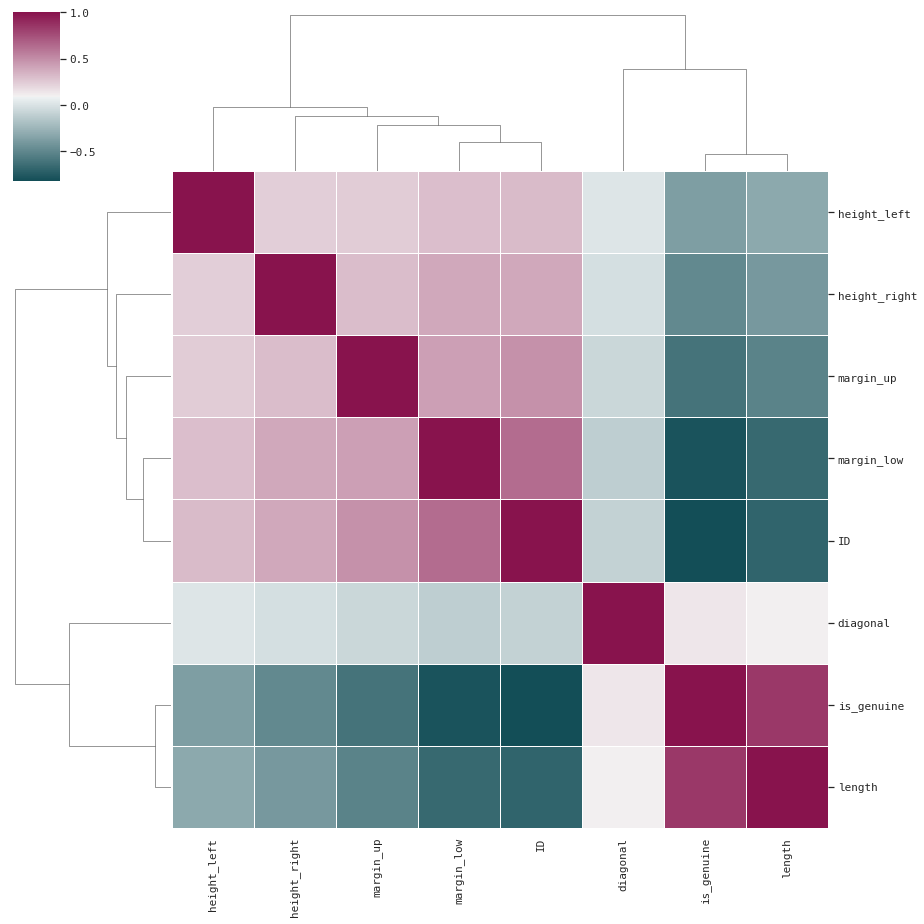

In [260]:
import seaborn
seaborn.set(font="monospace")
cmap = seaborn.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
seaborn.clustermap(Billets.corr(), linewidths=.5, figsize=(13, 13), cmap=cmap)

<AxesSubplot:>

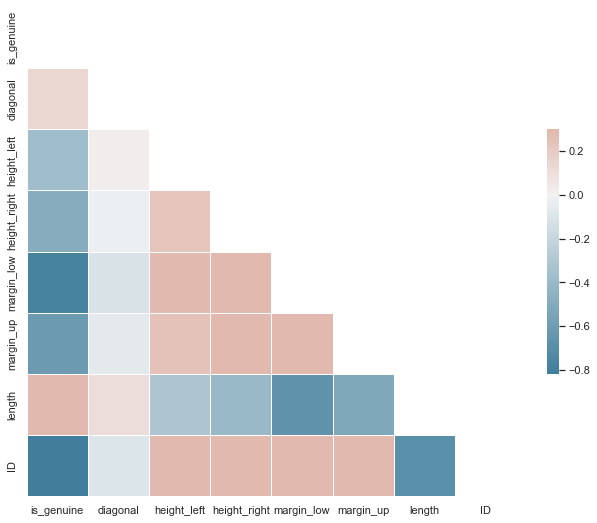

In [261]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = Billets.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# à faire : gridsearchcv() sur random forest classifier
# Ensemble learning avec best parameters for multi-fonctions